<a href="https://colab.research.google.com/github/rmehdi1/CommunityProject_Mobilize/blob/main/ChangeOrgAnalysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np

# Import Data

In [441]:
# Download latest version of the dataset
path = kagglehub.dataset_download("muhammedabdulazeem/petitions-from-changeorg")
print("Path to dataset files:", path)

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/muhammedabdulazeem/petitions-from-changeorg/versions/1"

# Load the CSV file into a DataFrame
df = pd.read_csv(os.path.join(dataset_path, "results.csv"))

Path to dataset files: /kaggle/input/petitions-from-changeorg


/tmp/ipython-input-441-1786828998.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dataset_path, "results.csv"))


**Dataset Details: Petitions from Change.org**

This project uses the **“Petitions from Change.org”** dataset from Kaggle, which contains over **24,000 public petitions** collected from [Change.org](https://www.change.org) using web scraping techniques (via the Python library `scrapy`). It contains petions Petitions span a wide range of social, environmental, and political issues.


**Why Change.Org:**

Change.org is the world’s largest online petition platform, making it an ideal source for studying grassroots campaign messaging. Its rich success metrics (like signatures and victories) offer measurable insights into what makes advocacy messaging effective.

See More about it at:
https://www.change.org/about

https://www.linkedin.com/company/change-org/




# Inspecting Datset

In [442]:
df.head()

,Unnamed: 0,petition_id,petition_ask,created_at,deleted_at,original_locale,title,description,targeting_description,letter_body,...,total_signup_count,supporter_message_count,hide_comments,hide_dm_action_panel,enable_human_verification,display_title,petition_title,petition_status,calculated_goal,progress
0,0,28127009,Free Kusha and reunite elephant pair,2021-04-01T00:07:47Z,NaN,en-IN,Karnataka Forest Department: Free Kusha and re...,"<p>Kusha, a male elephant from Dubare Elephant...","karnataka forest department, People for the Et...",Free Kusha and reunite elephant pair,...,84,NaN,False,False,False,Karnataka Forest Department: Free Kusha and re...,Karnataka Forest Department: Free Kusha and re...,active,7500,88.106667
1,1,28569017,Save Caracal cat in india,2021-04-25T19:56:09Z,NaN,en-IN,"Save Caracal cat in India: @BoardWelfare, @Man...",<p>#savefloppainindia trend and sharing this p...,Shri Prakash Javedkar (Cabinet Minister - Mini...,Save Caracal cat in india,...,8,NaN,False,False,False,"Save Caracal cat in India: @BoardWelfare, @Man...","Save Caracal cat in India: @BoardWelfare, @Man...",active,5000,52.920000
2,2,28566320,"Animal Treatment and ABC Centre for Borivli, K...",2021-04-25T15:40:17Z,NaN,en-IN,Municipal Commissioner of Mumbai: Animal Treat...,"<p>In Kandivli, Borivli Dahisar (Ward R), lack...",Municipal Commissioner of Mumbai,"Animal Treatment and ABC Centre for Borivli, K...",...,108,NaN,False,False,False,Municipal Commissioner of Mumbai: Animal Treat...,Municipal Commissioner of Mumbai: Animal Treat...,active,2500,94.680000
3,3,28543362,Seven Sebastian to say the N word once Unbanne...,2021-04-24T06:29:05Z,NaN,en-IN,Facebook: Seven Sebastian to say the N word on...,<p>SVen sebaAstian was banned on Fb and that w...,"Facebook, Germany",Seven Sebastian to say the N word once Unbanne...,...,2,NaN,False,False,False,Facebook: Seven Sebastian to say the N word on...,Facebook: Seven Sebastian to say the N word on...,active,100,6.000000
4,4,28471106,"Don't buy animals, Adopt them!",2021-04-20T03:45:00Z,NaN,en-IN,People for the Ethical Treatment of Animals (P...,<p>I feel that animals are not just a thing to...,People for the Ethical Treatment of Animals (P...,"Don't buy animals, Adopt them!",...,46,NaN,False,False,False,People for the Ethical Treatment of Animals (P...,People for the Ethical Treatment of Animals (P...,active,500,97.200000


In [443]:
df.describe()


,Unnamed: 0,petition_id,deleted_at,goal,lat,long,displayed_signature_count,total_signature_count,weekly_signature_count,total_page_views,total_share_count,daily_signature_count,monthly_signature_count,daily_signup_count,weekly_signup_count,monthly_signup_count,total_signup_count,supporter_message_count,calculated_goal,progress
count,24065.00000,2.406500e+04,0.0,25.000000,21844.000000,21844.000000,2.406500e+04,2.406500e+04,24065.000000,2.406500e+04,2.406500e+04,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,0.0,2.406500e+04,24065.000000
mean,12032.00000,2.512415e+07,NaN,24988.000000,20.658804,78.641688,8.002824e+03,7.006357e+03,236.993601,1.038450e+04,2.573867e+03,58.250031,491.874257,0.626512,13.962394,51.625390,1164.662373,NaN,1.075256e+04,48.226989
std,6947.11145,3.898197e+06,NaN,19856.239993,3.031797,8.266192,5.252928e+04,4.335863e+04,2373.335908,1.096157e+05,2.794019e+04,859.720190,3582.964189,7.928881,265.901304,586.680897,14908.715998,NaN,7.203991e+04,30.699688
min,0.00000,3.433500e+04,NaN,700.000000,-29.532800,-122.000000,5.000000e+00,5.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000e+02,5.000000
25%,6016.00000,2.315384e+07,NaN,3000.000000,20.593700,78.962900,1.500000e+01,1.500000e+01,0.000000,8.000000e+01,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,1.000000e+02,15.000000
50%,12032.00000,2.630225e+07,NaN,25000.000000,20.593700,78.962900,8.000000e+01,8.000000e+01,0.000000,2.740000e+02,3.800000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,NaN,1.000000e+02,52.300000
75%,18048.00000,2.806185e+07,NaN,50000.000000,20.593700,78.962900,6.410000e+02,6.410000e+02,1.000000,1.288000e+03,2.120000e+02,0.000000,16.000000,0.000000,0.000000,2.000000,96.000000,NaN,1.000000e+03,76.026667
max,24064.00000,2.867789e+07,NaN,50000.000000,55.378100,145.491000,1.004861e+06,1.002221e+06,55762.000000,3.707960e+06,1.015223e+06,21713.000000,75298.000000,228.000000,13861.000000,22606.000000,571196.000000,NaN,1.500000e+06,99.933333


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24065 entries, 0 to 24064
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 24065 non-null  int64  
 1   petition_id                24065 non-null  int64  
 2   petition_ask               24065 non-null  object 
 3   created_at                 24065 non-null  object 
 4   deleted_at                 0 non-null      float64
 5   original_locale            24065 non-null  object 
 6   title                      24065 non-null  object 
 7   description                24065 non-null  object 
 8   targeting_description      24057 non-null  object 
 9   letter_body                24065 non-null  object 
 10  end_date                   12816 non-null  object 
 11  goal                       25 non-null     float64
 12  slug                       24065 non-null  object 
 13  victory_date               970 non-null    obj

# FIXING DATA TYPES

Date format

In [445]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['victory_date'] = pd.to_datetime(df['victory_date'], errors='coerce')

# Strip timezone to make both tz-naive
df['created_at'] = df['created_at'].dt.tz_localize(None)
df['end_date']  = df['end_date'].dt.tz_localize(None)
df['victory_date'] = df['victory_date'].dt.tz_localize(None)

Create Flags

In [446]:
# flag for petitions that are still active (see null value analysis on end_date)
df['is_active'] = df['end_date'].isnull()
df['has_end_date'] = df['end_date'].notna()

df['has_location'] = df['lat'].notna() & df['long'].notna()

df['has_victory_date'] = df['victory_date'].notna()

Define numeric columns

In [447]:
# AUTO-DEFINE NUMERICAL COLUMNS
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude ID-like columns & lat/long from numerical analysis
id_like_cols = ['Unnamed: 0', 'petition_id', 'lat', 'long']
numerical_cols = [col for col in numerical_cols if col not in id_like_cols]

print("Numerical columns:", numerical_cols)

Numerical columns: ['deleted_at', 'goal', 'displayed_signature_count', 'total_signature_count', 'weekly_signature_count', 'total_page_views', 'total_share_count', 'daily_signature_count', 'monthly_signature_count', 'daily_signup_count', 'weekly_signup_count', 'monthly_signup_count', 'total_signup_count', 'supporter_message_count', 'calculated_goal', 'progress']


Define Categorical Columns

In [448]:
categorical_cols = [
    'petition_status', 'is_victory', 'is_verified_victory', 'is_pledge', 'sponsored_campaign',
    'hide_comments', 'hide_dm_action_panel', 'enable_human_verification',
    'original_locale', 'has_location', 'is_active',
    'has_end_date'
]

# Filter to only existing columns
categorical_cols = [col for col in categorical_cols if col in df.columns]
print("Categorical columns:", categorical_cols)



Categorical columns: ['petition_status', 'is_victory', 'is_verified_victory', 'is_pledge', 'sponsored_campaign', 'hide_comments', 'hide_dm_action_panel', 'enable_human_verification', 'original_locale', 'has_location', 'is_active', 'has_end_date']


In [449]:
# VERIFY DATA QUALITY
print("\nData quality check:")
print(f"Total rows: {len(df)}")
print(f"Active petitions: {df['is_active'].sum()}")
print(f"Has location: {df['has_location'].sum()}")
print(f"Has end date: {df['has_end_date'].sum()}")
print(f"Has victory date: {df['has_victory_date'].sum()}")


Data quality check:
Total rows: 24065
Active petitions: 11249
Has location: 21844
Has end date: 12816
Has victory date: 970


# Null Values

In [450]:
# Total number of rows
total_rows = len(df)

# Count and percent of missing values
null_counts = df.isnull().sum()
null_percent = (null_counts / total_rows) * 100

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Percent Missing': null_percent
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Null Count'] > 0]

# Sort by % missing, descending
missing_summary = missing_summary.sort_values(by='Percent Missing', ascending=False)

# Display the result
print(missing_summary)


                         Null Count  Percent Missing
deleted_at                    24065       100.000000
supporter_message_count       24065       100.000000
victory_description           24064        99.995845
goal                          24040        99.896115
victory_date                  23095        95.969250
end_date                      11249        46.744234
lat                            2221         9.229171
long                           2221         9.229171
targeting_description             8         0.033243


### **Deleted Variables**

Removed columns with high missingness and minimal analytical value:
- `deleted_at` (100% missing)
- `supporter_message_count` (100% missing)
- `victory_description` (99.9% missing)

### **Variable: `goal` / `calculated_goal`**

The `goal` column is sparsely populated and likely deprecated. The `calculated_goal` column is complete, but based on Change.org’s public documentation and the dataset source, it may have been inferred by the scraper rather than sourced directly from the platform. Since Change.org dynamically adjusts visible goals to encourage engagement, we treat `calculated_goal` as an approximate milestone—not a definitive success target.


In [451]:
# Drop columns with excessive missing values or limited analytical use
columns_to_drop = [
    'deleted_at',
    'supporter_message_count',
    'victory_description',
    'goal'  # Sparse and likely deprecated
]

df.drop(columns=columns_to_drop, inplace=True)


**Exploring variable: `victory_date`**

In [452]:
# 1. Check how many total victories exist
total_victories = df['is_victory'].sum()

# 2. Count of rows where `is_victory` is True but `victory_date` is missing
victory_missing_date = df[(df['is_victory'] == True) & (df['victory_date'].isnull())].shape[0]

# 3. Count of rows where `is_victory` is False but `victory_date` is present (shouldn't happen)
non_victory_with_date = df[(df['is_victory'] == False) & (df['victory_date'].notnull())].shape[0]

# 4. Summary of non-null victory dates
victory_date_summary = df[df['victory_date'].notnull()]['victory_date'].describe()

# 5. create flag for analysis
df['has_victory_date'] = df['victory_date'].notnull()

# Print findings
print(f"Total victories: {total_victories}")
print(f"Victories missing `victory_date`: {victory_missing_date}")
print(f"Non-victories with `victory_date`: {non_victory_with_date}")
print("\nVictory date distribution (where not null):")
print(victory_date_summary)


Total victories: 938
Victories missing `victory_date`: 0
Non-victories with `victory_date`: 32

Victory date distribution (where not null):
count                              970
mean     2020-09-18 11:39:12.989690624
min                2017-03-12 00:00:00
25%                2020-06-21 12:00:00
50%                2021-01-13 00:00:00
75%                2021-04-16 00:00:00
max                2021-05-01 00:00:00
Name: victory_date, dtype: object




The `victory_date` field is valid only for petitions marked as victories. Remove inconsistent values where non-victorious petitions have a `victory_date`, then create a new feature to calculate the number of days it took to reach victory.


In [453]:
#calculate days to victory
df['days_to_victory'] = (df['victory_date'] - df['created_at']).dt.days

# Nullify invalid victory dates
df.loc[df['is_victory'] == False, 'victory_date'] = pd.NaT

# Create duration feature (days from creation to victory)
df['days_to_victory'] = (df['victory_date'] - df['created_at']).dt.days

# keep flag
df['has_victory_date'] = df['victory_date'].notnull()

**Handling `end_date`**

In [454]:


# 1. How many are missing?
missing_end = df['end_date'].isnull().sum()
print(f"Missing end_date: {missing_end} out of {len(df)}")

# 2. Check relationship with petition_status
print("\nMissing end_date by petition_status:")
print(df[df['end_date'].isnull()]['petition_status'].value_counts())

print("\nNon-missing end_date by petition_status:")
print(df[df['end_date'].notnull()]['petition_status'].value_counts())

# 3. Check relationship with is_victory
print("\nMissing end_date by is_victory:")
print(df[df['end_date'].isnull()]['is_victory'].value_counts())

print("\nNon-missing end_date by is_victory:")
print(df[df['end_date'].notnull()]['is_victory'].value_counts())

# 4. Create helper flag for missing end date
df['has_end_date'] = df['end_date'].notnull()


Missing end_date: 11249 out of 24065

Missing end_date by petition_status:
petition_status
active     10758
victory      491
Name: count, dtype: int64

Non-missing end_date by petition_status:
petition_status
active     12357
victory      447
closed        12
Name: count, dtype: int64

Missing end_date by is_victory:
is_victory
False    10758
True       491
Name: count, dtype: int64

Non-missing end_date by is_victory:
is_victory
False    12369
True       447
Name: count, dtype: int64


In [455]:
latest_date = df['created_at'].max()
print(f"Latest creation date: {latest_date}")
latest_enddate = df['end_date'].max()
print(f"Latest end date: {latest_enddate}")

Latest creation date: 2021-05-02 15:05:21
Latest end date: 2022-01-26 00:00:00


**Creating Duration Days**

Assumption: Use last end date to be the date of scraping and wherever we don't have an end date we assume petition is still active.

Scraping Date Buffer: Used 1 month after latest end_date as scraping date to account for realistic data processing time and provide active petitions adequate time for signature accumulation, while naturally eliminating same-day petition edge cases that cause negative duration values

In [456]:
# duration days
print("\n" + "="*50)
print("CREATING DURATION_DAYS")
print("="*50)

latest_enddate = df['end_date'].max()
scraping_date = latest_enddate + pd.Timedelta(days=30)
print(f"Latest end_date: {latest_enddate}")
print(f"Using scraping_date: {scraping_date}")

# Calculate duration_days
df['duration_days'] = np.where(
    df['end_date'].notna(),
    (df['end_date'] - df['created_at']).dt.days,
    (scraping_date - df['created_at']).dt.days  # For active petitions
)

#  VALIDATE DURATION_DAYS
print(f"\nDuration_days statistics:")
print(df['duration_days'].describe())

print(f"\nDuration_days by petition_status:")
print(df.groupby('petition_status')['duration_days'].agg(['count', 'mean', 'median', 'min', 'max']))

print(f"\nDuration_days by is_active:")
print(df.groupby('is_active')['duration_days'].agg(['count', 'mean', 'median', 'min', 'max']))

# CHECK FOR NEGATIVE OR ZERO VALUES
negative_duration = df[df['duration_days'] <= 0]
print(f"\nPetitions with negative/zero duration: {len(negative_duration)}")
if len(negative_duration) > 0:
    print("Sample negative duration cases:")
    print(negative_duration[['created_at', 'end_date', 'duration_days', 'petition_status']].head())

# ADD DURATION_DAYS TO NUMERICAL_COLS
if 'duration_days' not in numerical_cols:
    numerical_cols.append('duration_days')
    print(f"\nAdded duration_days to numerical_cols. Total: {len(numerical_cols)}")



CREATING DURATION_DAYS
Latest end_date: 2022-01-26 00:00:00
Using scraping_date: 2022-02-25 00:00:00

Duration_days statistics:
count    24065.000000
mean       390.026512
std        192.457235
min         -1.000000
25%        333.000000
50%        365.000000
75%        370.000000
max       4137.000000
Name: duration_days, dtype: float64

Duration_days by petition_status:
                 count        mean  median    min     max
petition_status                                          
active           23115  388.138698   365.0  298.0  4137.0
closed              12  145.333333    -1.0   -1.0   620.0
victory            938  439.678038   369.0  301.0  2479.0

Duration_days by is_active:
           count        mean  median    min     max
is_active                                          
False      12816  419.134988   366.0   -1.0  2554.0
True       11249  356.863188   329.0  298.0  4137.0

Petitions with negative/zero duration: 8
Sample negative duration cases:
              created_a

In [457]:
# ADD THIS VERIFICATION AFTER YOUR CODE:
# Check for null values
print(f"duration_days null count: {df['duration_days'].isnull().sum()}")
print(f"Total rows: {len(df)}")

# Quick sample check
print(f"\nSample duration_days values:")
print(df[['created_at', 'end_date', 'duration_days', 'is_active']].head())

# Check the negative values fix
if negative_duration.shape[0] > 0:
    print("\nFixing negative values...")
    df['duration_days'] = np.where(
        df['duration_days'] <= 0,
        1,  # Minimum 1 day
        df['duration_days']
    )
    print(f"After fix - Min duration_days: {df['duration_days'].min()}")
    print(f"Negative values remaining: {(df['duration_days'] <= 0).sum()}")


duration_days null count: 0
Total rows: 24065

Sample duration_days values:
           created_at end_date  duration_days  is_active
0 2021-04-01 00:07:47      NaT          329.0       True
1 2021-04-25 19:56:09      NaT          305.0       True
2 2021-04-25 15:40:17      NaT          305.0       True
3 2021-04-24 06:29:05      NaT          306.0       True
4 2021-04-20 03:45:00      NaT          310.0       True

Fixing negative values...
After fix - Min duration_days: 1.0
Negative values remaining: 0


In [458]:
df.isnull().sum()[df.isnull().sum() > 0]


,0
targeting_description,8
end_date,11249
victory_date,23127
lat,2221
long,2221
days_to_victory,23127


add duration_days to numerical variables

In [459]:

if 'duration_days' not in numerical_cols:
    numerical_cols.append('duration_days')



The `end_date` field indicates when a petition was closed. Nearly half the petitions have a missing `end_date`, mostly those still marked as active. Create  an `is_active` flag and calculate the petition duration only for those with a known end date.


In [460]:
#create is_active flag
df['is_active'] = df['end_date'].isnull()

#df.loc[df['is_active'], 'duration_days'] = None  # Set to null if still active

**Handling `lat` and `long`**

Rows missing lat or long: 2221
Rows where both lat and long are missing: 2221

Victory rate by location presence:
has_location
False    0.038271
True     0.039050
Name: is_victory, dtype: float64


<Axes: >

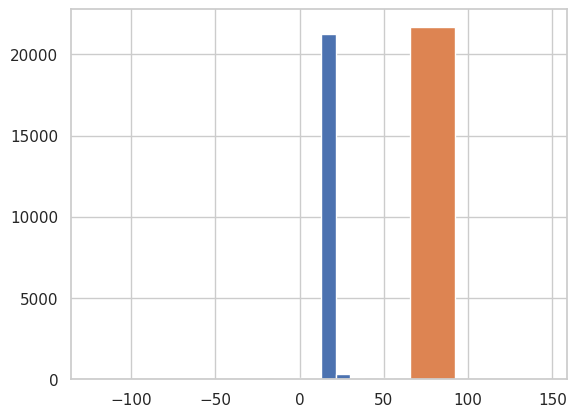

In [461]:
# 1. Check how many rows are missing lat/long together
missing_location = df[df['lat'].isnull() | df['long'].isnull()].shape[0]
print(f"Rows missing lat or long: {missing_location}")

# 2. Check if lat/long are always missing together
both_missing = df[df['lat'].isnull() & df['long'].isnull()].shape[0]
print(f"Rows where both lat and long are missing: {both_missing}")

# 3. Do petitions with or without location differ in victory rates?
df['has_location'] = df['lat'].notnull()

print("\nVictory rate by location presence:")
print(df.groupby('has_location')['is_victory'].mean())

# 4. Plot quick histogram of lat/long (if needed later)
df['lat'].hist()
df['long'].hist()




Only ~9% of petitions are missing location data, and missing values occur in pairs (both `lat` and `long`). The presence of location data does not significantly impact victory rates. These fields will be retained for geographic analyses and mapping, but no imputation will be performed. Assess way forward on imputation or variable handling for models post EDA


**Handling `targeting_description`**

In [462]:
# Check examples of missing and non-missing
print("Missing rows:")
print(df[df['targeting_description'].isnull()][['title', 'description']].head())

# Optional: Frequency of values (non-null)
print("\nTop targeting descriptions:")
print(df['targeting_description'].value_counts().head(5))

# View rows with missing targeting_description
missing_targeting = df[df['targeting_description'].isnull()]

# Display relevant context for those rows
missing_targeting[['title', 'description', 'letter_body', 'petition_status', 'original_locale']].head(10)


Missing rows:
                                                title  \
1535  NONE: avoid non-veg foods as ANIMALS are dying!   
1542  NONE: avoid non-veg foods as ANIMALS are dying!   
1549  NONE: avoid non-veg foods as ANIMALS are dying!   
1556  NONE: avoid non-veg foods as ANIMALS are dying!   
1563  NONE: avoid non-veg foods as ANIMALS are dying!   

                                            description  
1535  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1542  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1549  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1556  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1563  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  

Top targeting descriptions:
targeting_description
Government of India        228
Everyone                   143
Prime Minister of India    131
Government                 121
Students                   103
Name: count, dtype: int64


,title,description,letter_body,petition_status,original_locale
1535,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1542,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1549,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1556,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1563,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1570,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1577,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1584,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN


In [463]:
# Most common targeting descriptions
print("Top 10 most frequent targeting descriptions:")
print(df['targeting_description'].value_counts().head(10))

# Show a few unique examples for variety
print("\nSample unique targeting descriptions:")
print(df['targeting_description'].dropna().unique()[:10])


Top 10 most frequent targeting descriptions:
targeting_description
Government of India                                   228
Everyone                                              143
Prime Minister of India                               131
Government                                            121
Students                                              103
Arvind Kejriwal                                        96
People for the Ethical Treatment of Animals (PETA)     95
Indian Government                                      80
Ministry of Health and Family welfare                  80
United Nations                                         72
Name: count, dtype: int64

Sample unique targeting descriptions:
['karnataka forest department, People for the Ethical Treatment of Animals (PETA), Peta India'
 'Shri Prakash Javedkar (Cabinet Minister - Ministry of Information and Broadcasting)'
 'Municipal Commissioner of Mumbai' 'Facebook, Germany'
 'People for the Ethical Treatment of Animals (PET

In [464]:
# Group and display a sample for the top 5
for target in df['targeting_description'].value_counts().head(5).index:
    sample = df[df['targeting_description'] == target][['title', 'description']].head(1)
    print(f"\nTargeting: {target}\n{sample}")



Targeting: Government of India
                                                 title  \
783  Government of India: End of cruelities against...   

                                           description  
783  <p>This petition is made to end human crueltie...  

Targeting: Everyone
                                      title  \
7  everyone: help save panna national park.   

                                         description  
7  <p>I recently read an article about the Ken Be...  

Targeting: Prime Minister of India
                                                  title  \
3338  #RTIRules | RTI law will continue to suffer ti...   

                                            description  
3338  <p><strong>Our power to ask questions is being...  

Targeting: Government
                                    title  \
4732  Government: CANCEL 12TH BOARD EXAM!   

                                            description  
4732  <p>In the midst of rising cases in India, CBSE...  

Targeting

The 8 missing `targeting_description` values are all duplicates of the same petition (e.g., repeated titles/descriptions). Since this field typically names the recipient or group being petitioned, we’ll **impute with a placeholder** like `"Unknown"` to preserve rows for analysis.


In [465]:
# Impute missing targeting_description with 'Unknown'
df['targeting_description'] = df['targeting_description'].fillna('Unknown')


In [466]:
df.isnull().sum()[df.isnull().sum() > 0]


,0
end_date,11249
victory_date,23127
lat,2221
long,2221
days_to_victory,23127


# checking for duplicates

In [467]:
# Count fully duplicated rows
full_dupes = df.duplicated().sum()
print(f"Fully duplicated rows: {full_dupes}")


Fully duplicated rows: 0


In [468]:
# Check if petition_id is unique
is_unique = df['petition_id'].is_unique
print(f"petition_id is unique: {is_unique}")

# Check for duplicate title + description
title_desc_dupes = df.duplicated(subset=['title', 'description']).sum()
print(f"Duplicate title+description rows: {title_desc_dupes}")


petition_id is unique: False
Duplicate title+description rows: 20984


In [469]:
# Count duplicates by petition_id
duplicate_ids = df['petition_id'][df['petition_id'].duplicated()].value_counts()
print(f"Number of duplicated petition_ids: {duplicate_ids.count()}")
print(duplicate_ids.head())


Number of duplicated petition_ids: 2995
petition_id
27073847    23
25127929    23
16400121    22
26099311    21
25503603    20
Name: count, dtype: int64


In [470]:
# View sample rows for a duplicated petition_id
sample_pid = duplicate_ids.index[0]
df[df['petition_id'] == sample_pid]


,Unnamed: 0,petition_id,petition_ask,created_at,original_locale,title,description,targeting_description,letter_body,end_date,...,petition_title,petition_status,calculated_goal,progress,is_active,has_end_date,has_location,has_victory_date,days_to_victory,duration_days
9932,9932,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9939,9939,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9946,9946,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9953,9953,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9960,9960,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9967,9967,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9974,9974,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
9981,9981,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
17850,17850,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,True,False,True,False,NaN,392.0
17857,17857,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson

In [471]:
# List of columns to check for inconsistencies
check_cols = ['petition_status', 'is_victory', 'progress', 'total_signature_count',
              'created_at', 'end_date', 'victory_date', 'targeting_description', 'has_location']

# Find IDs with multiple entries
dup_ids = df['petition_id'][df['petition_id'].duplicated()].unique()

# Collect IDs that differ on any checked column
inconsistent = []
for pid in dup_ids:
    sub = df[df['petition_id'] == pid][check_cols]
    if sub.nunique().gt(1).any():
        inconsistent.append(pid)

print(f"Number of petition_ids with inconsistent values: {len(inconsistent)}")


Number of petition_ids with inconsistent values: 14


In [472]:
# Exclude IDs and fully textual fields from check
exclude_cols = ['Unnamed: 0', 'petition_id', 'petition_title', 'title', 'description', 'letter_body']
check_cols_all = [col for col in df.columns if col not in exclude_cols]

# Find inconsistent duplicates with broader coverage
inconsistent_full = []
for pid in dup_ids:
    sub = df[df['petition_id'] == pid][check_cols_all]
    if sub.nunique().gt(1).any():
        inconsistent_full.append(pid)

print(f"Number of petition_ids with ANY differences (broader check): {len(inconsistent_full)}")


Number of petition_ids with ANY differences (broader check): 17


keep latest version (assuming higher signature count = most recent)

In [473]:
# Keep row with the highest total_signature_count
df = df.sort_values(by='total_signature_count', ascending=False)
df = df.drop_duplicates(subset='petition_id', keep='first')


# UNIVARIATE ANALYSIS

In [474]:
df.head()

,Unnamed: 0,petition_id,petition_ask,created_at,original_locale,title,description,targeting_description,letter_body,end_date,...,petition_title,petition_status,calculated_goal,progress,is_active,has_end_date,has_location,has_victory_date,days_to_victory,duration_days
23464,23464,19255095,"Veterinarian brutally ravished, killed and bu...",2019-11-28 14:12:55,en-IN,"Smriti Irani, Minister of women and child deve...",<p>For not only veterinary doctors but all the...,"Smriti Irani, Minister of women and child deve...",Veterinarian brutally killed and Burnt #justic...,2020-12-04,...,"Smriti Irani, Minister of women and child deve...",active,1500000,66.990733,False,True,True,False,NaN,371.0
12193,12193,10492133,No more kids with cancer: clean up the Santa S...,2017-02-27 20:05:15,en-US,No more kids with cancer: clean up the Santa S...,<p>When my daughter Grace Ellen was diagnosed ...,"Dianne Feinstein, Gavin Newsom, Julia Brownley...",#1millionparents near and far want ALL of the ...,2020-10-08,...,No more kids with cancer: clean up the Santa S...,active,1000000,73.336600,False,True,True,False,NaN,1318.0
2562,2562,12499840,Mumbai’s climate and ecology in danger.,2017-10-09 16:48:57,en-IN,"CM Uddhav Thackeray, JICA Stop the cutting of ...","<p>Mumbai, the city of dreams in India , while...","Narendra Modi, national green tribunal, Suprem...",YES! Mumbai’s climate and ecology is in danger...,2021-10-15,...,"CM Uddhav Thackeray, JICA Stop the cutting of ...",victory,1000000,72.846800,False,True,True,True,1101.0,1466.0
10318,10318,10373393,Emergency Medical Care Centers in Railway stat...,2017-02-16 01:57:10,en-IN,Shri. Piyush Goyal: Emergency Medical Care Cen...,"<p>Friends,</p>\n<p>This is to bring to your a...",Narendra Damodardas Modi,Emergency Medical Care Centers in Railway stat...,2021-04-09,...,Shri. Piyush Goyal: Emergency Medical Care Cen...,active,1000000,68.603000,False,True,True,False,NaN,1512.0
23818,23818,19272202,Hang the criminal(s) of Priyanka Reddy Rape/Mu...,2019-11-29 14:05:13,en-IN,Indian Judiciary: Hang the criminal(s) of Priy...,<p>Since we all know what happened in 2012. Th...,"Indian Judiciary, Hyderabad Police, Government...",Hang the criminal(s) of Priya Reddy Rape/Murde...,2020-12-06,...,Indian Judiciary: Hang the criminal(s) of Priy...,victory,1000000,57.443100,False,True,True,True,6.0,372.0


In [475]:
print(numerical_cols)

['deleted_at', 'goal', 'displayed_signature_count', 'total_signature_count', 'weekly_signature_count', 'total_page_views', 'total_share_count', 'daily_signature_count', 'monthly_signature_count', 'daily_signup_count', 'weekly_signup_count', 'monthly_signup_count', 'total_signup_count', 'supporter_message_count', 'calculated_goal', 'progress', 'duration_days']


In [476]:


# Auto-define numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# exclude ID-like columns & lat/long
id_like_cols = ['Unnamed: 0', 'petition_id', 'lat', 'long']
numerical_cols = [col for col in numerical_cols if col not in id_like_cols]

print(numerical_cols)


['displayed_signature_count', 'total_signature_count', 'weekly_signature_count', 'total_page_views', 'total_share_count', 'daily_signature_count', 'monthly_signature_count', 'daily_signup_count', 'weekly_signup_count', 'monthly_signup_count', 'total_signup_count', 'calculated_goal', 'progress', 'days_to_victory', 'duration_days']


In [477]:


for col in categorical_cols:
    print(f"\n{col} value counts:\n{df[col].value_counts(normalize=True) * 100}")



petition_status value counts:
petition_status
active     95.975333
victory     3.862382
closed      0.162285
Name: proportion, dtype: float64

is_victory value counts:
is_victory
False    96.137618
True      3.862382
Name: proportion, dtype: float64

is_verified_victory value counts:
is_verified_victory
False    99.935086
True      0.064914
Name: proportion, dtype: float64

is_pledge value counts:
is_pledge
False    100.0
Name: proportion, dtype: float64

sponsored_campaign value counts:
sponsored_campaign
False    100.0
Name: proportion, dtype: float64

hide_comments value counts:
hide_comments
False    99.545602
True      0.454398
Name: proportion, dtype: float64

hide_dm_action_panel value counts:
hide_dm_action_panel
False    100.0
Name: proportion, dtype: float64

enable_human_verification value counts:
enable_human_verification
False    99.935086
True      0.064914
Name: proportion, dtype: float64

original_locale value counts:
original_locale
en-IN    98.214865
en-US     0.7789

Visualize

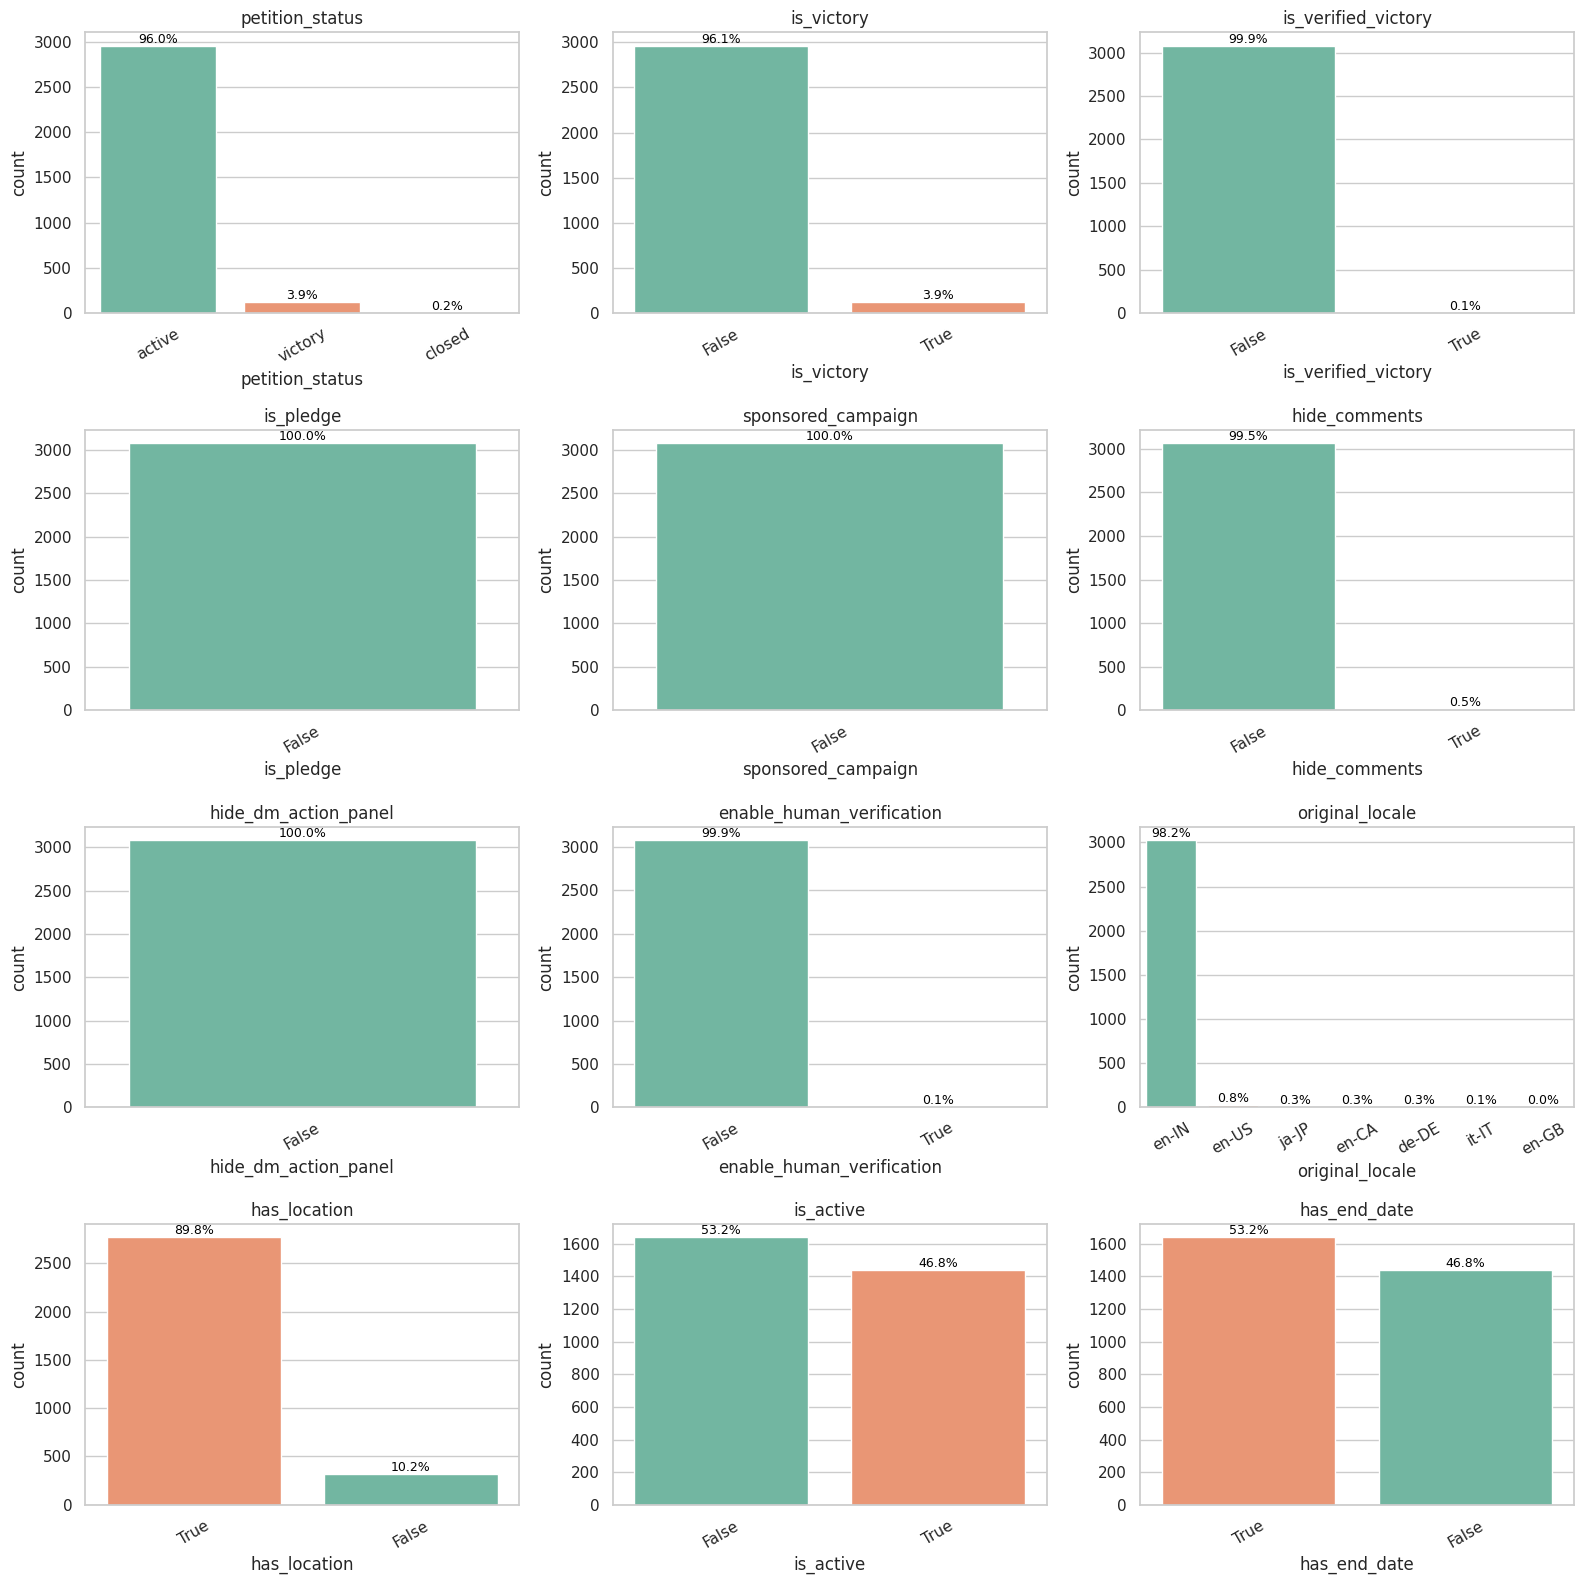

In [478]:

# Setup
num_cols = len(categorical_cols)
cols = 3  # Number of plots per row
rows = (num_cols + cols - 1) // cols  # Calculate number of rows

# Set style
sns.set(style="whitegrid")

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(categorical_cols):
    ax = sns.countplot(
        data=df,
        x=col,
        hue=col,
        order=df[col].value_counts().index,
        ax=axes[i],
        palette='Set2',
        legend=False  # Avoid duplicate legends
    )
    axes[i].set_title(f'{col}', fontsize=12)

    # Add percentages
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black')

    axes[i].tick_params(axis='x', rotation=30)

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Numerical Variables**

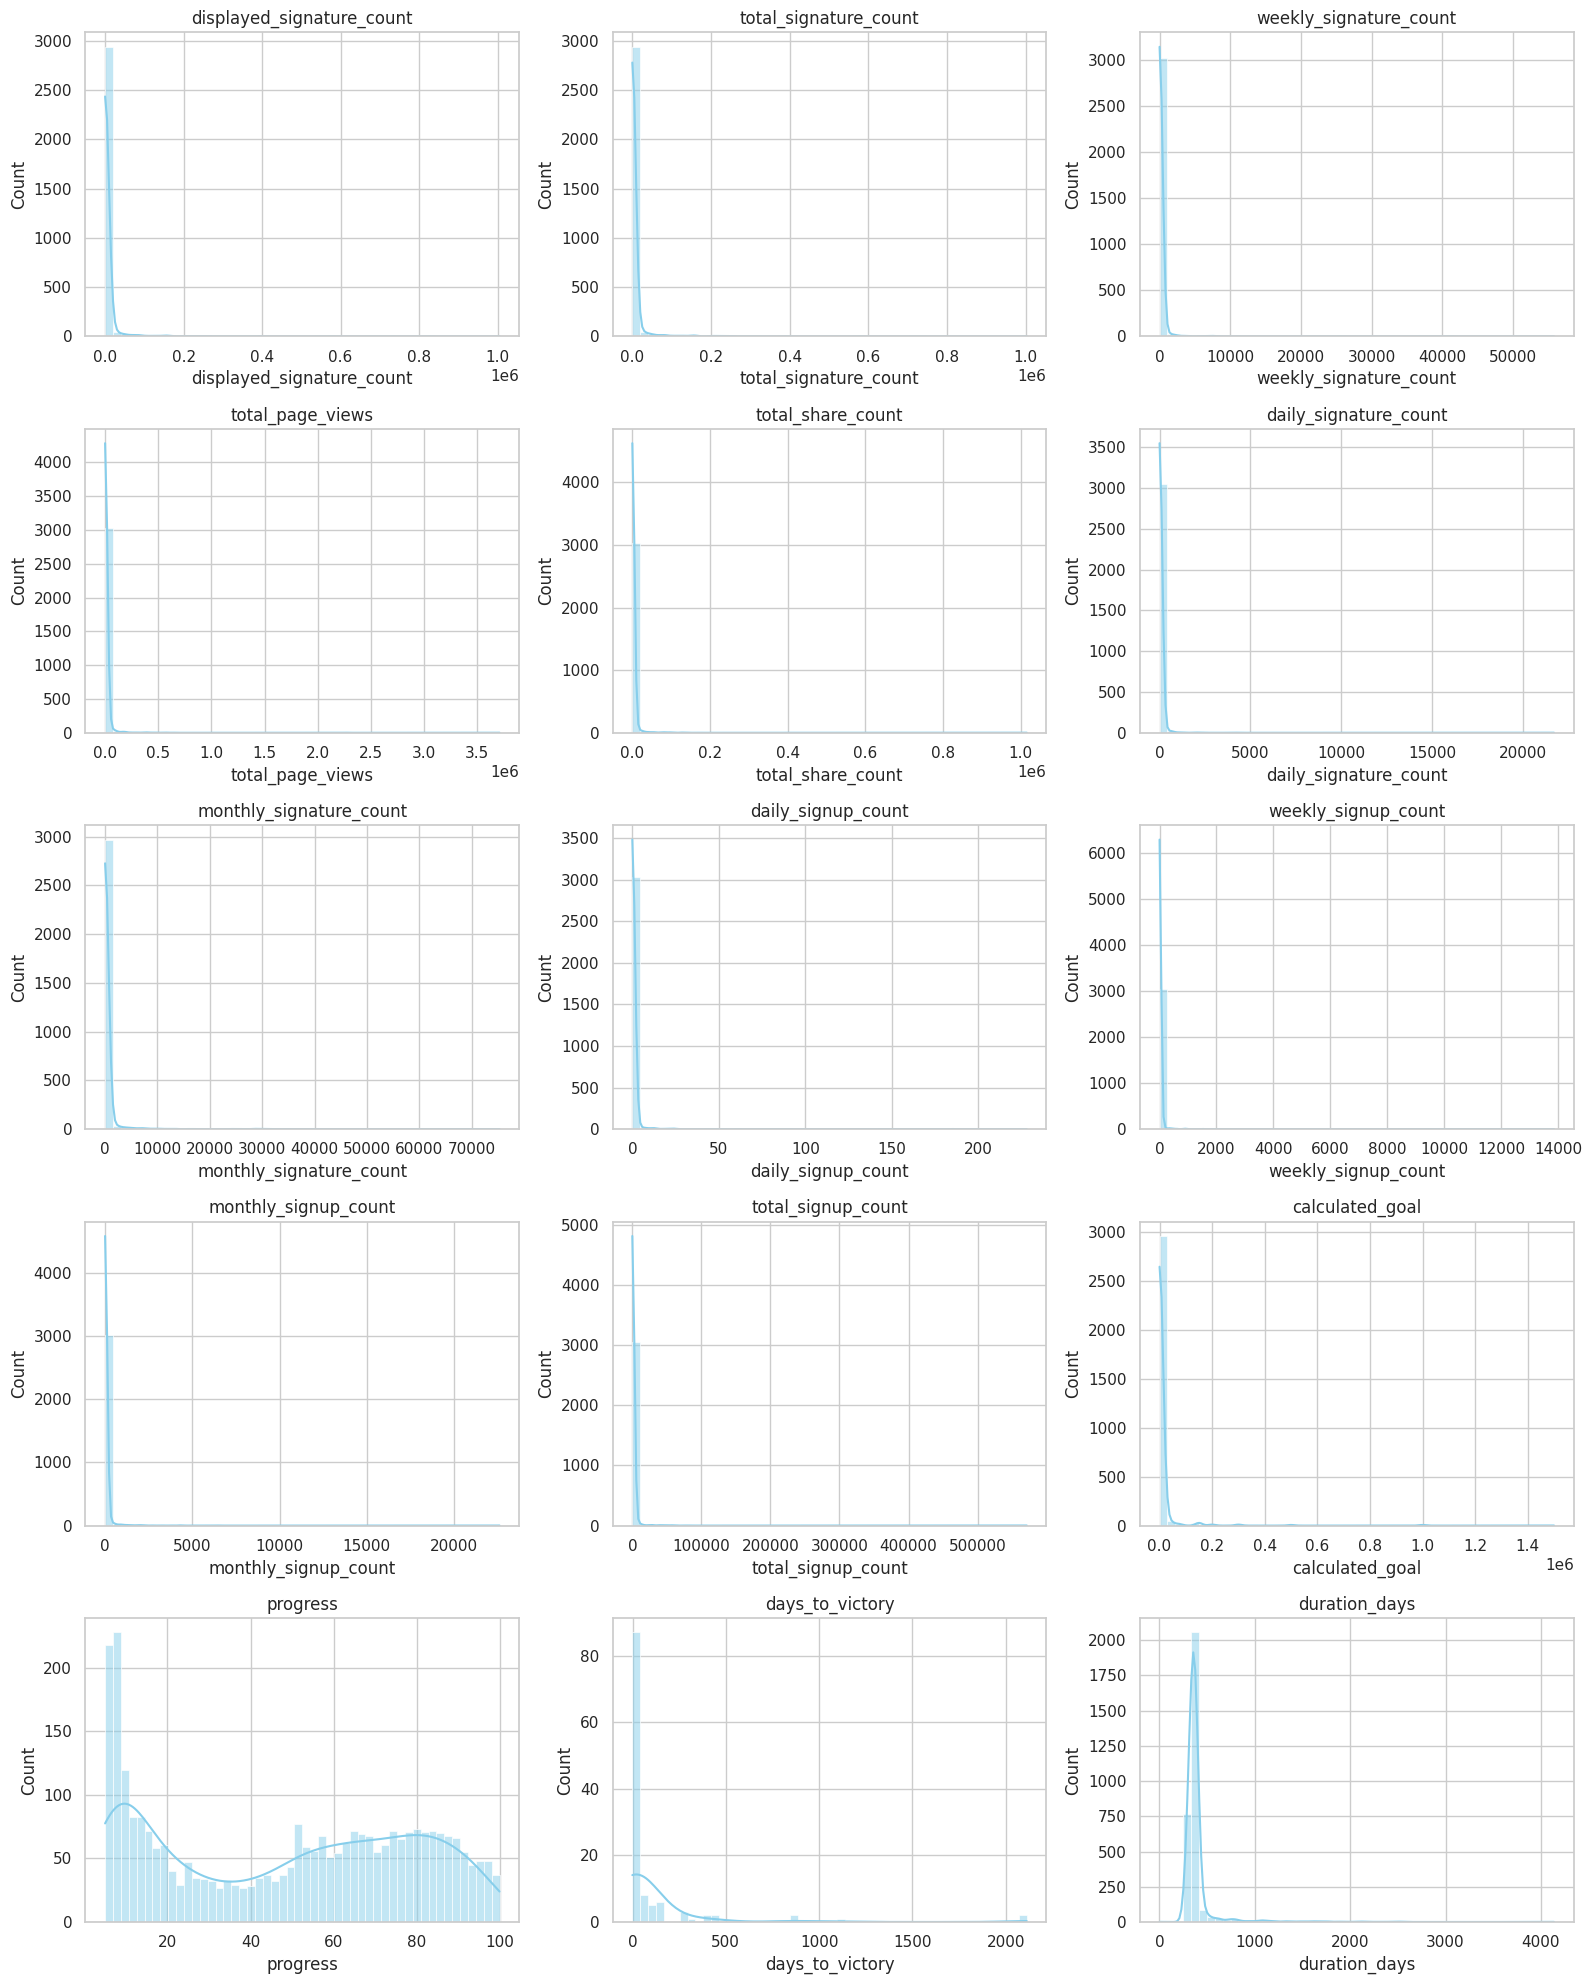

In [479]:


# Setup
num_cols = len(numerical_cols)
cols = 3  # Number of plots per row
rows = (num_cols + cols - 1) // cols  # Compute number of rows

# Set global style
sns.set(style="whitegrid")

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'{col}', fontsize=12)

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### **Categorical Variables Summary**

** Victory and Success Metrics**
- **Victory Rate**: Only 3.86% of petitions achieve victory (938 out of 24,065)
- **Petition Status**:
 - Active: 96.1%
 - Victory: 3.9%
- **No pledge campaigns**: 100% are standard petitions (not pledge-based)
- **No sponsored campaigns**: 100% are organic, grassroots petitions

**Geographic and Platform Features**
- **Location Data**: 89.8% of petitions have geographic coordinates
- **Primary Locale**: 98.2% are from India (en-IN), with small portions from US, Japan, Canada, Germany
- **Comments**: 99.5% allow comments (default setting)

**Temporal Patterns
- **Active Status**: 46.8% still active, 53.2% closed
- **Victory Dates**: Only 3.86% have recorded victory dates (matches victory rate)

### **Numeric Variables Summary**

**Engagement Metrics (High Variation)**
- **Signature Counts**: Extremely right-skewed distributions
 - Most petitions: <100 signatures
 - Top petitions: >100K signatures
- **Page Views & Shares**: Similar heavy-tailed distributions
- **Signup Metrics**: Lower engagement than signatures


### **Key Observations**
- **Extreme outliers** in all engagement metrics suggest viral vs. non-viral petition dynamics
- **Progress metric** averages 48% toward calculated goals


# Correlation & Collinearity

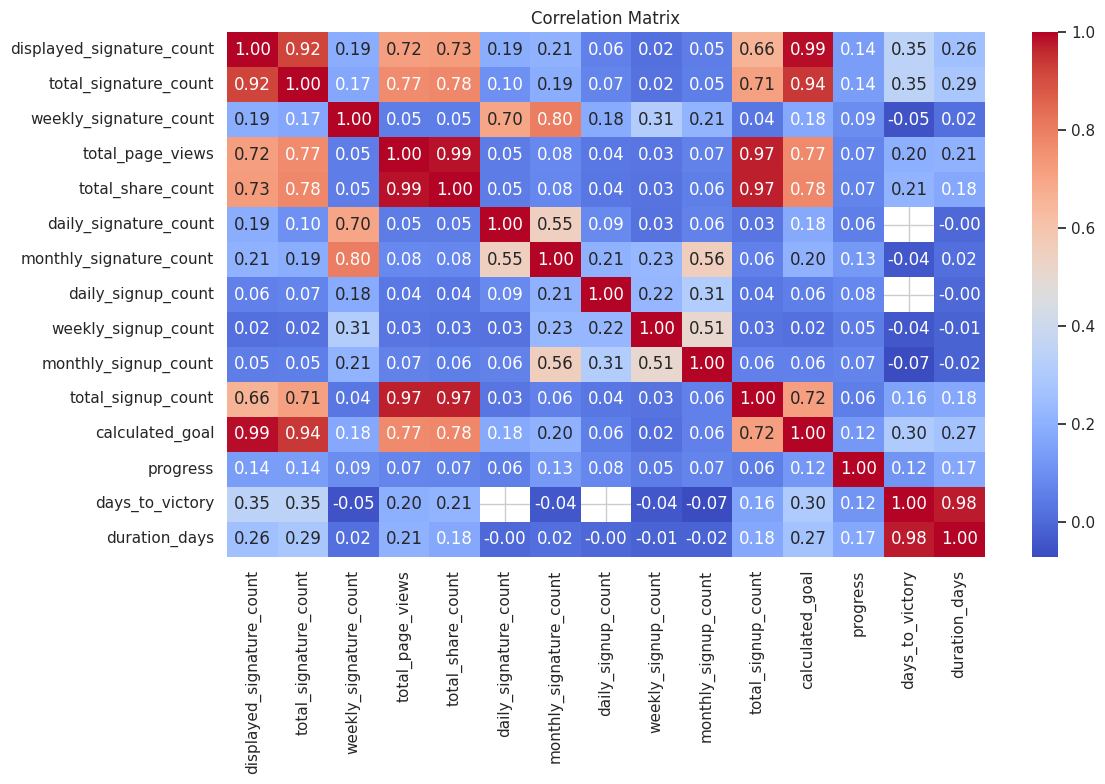

In [480]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Correlation & Multicollinearity Analysis

###  Highly Correlated Variables (Dropped)
- `displayed_signature_count`: r = 0.99 with `total_signature_count`
- `total_share_count`: r = 0.99 with `total_page_views`
- `calculated_goal`: redundant with signature counts
- `total_signup_count`: r = 0.97 with `total_page_views`
- `days_to_victory`: r = 0.97 with `duration_days` given its duration for petitions that have declared victory but its null for majority of the data

These variables added no new information and were removed to prevent multicollinearity.



In [481]:
# Drop redundant features based on multicollinearity
drop_corr = [
    'displayed_signature_count',
    'calculated_goal',
    'total_share_count',
    'total_signup_count',
    'days_to_victory'
]
df = df.drop(columns=drop_corr)


# FEATURE ENGINEERING

## Feature Engineering: Performance Metrics & Activity Patterns

### Rationale
Exploratory data analysis revealed significant zero-inflation in temporal signature variables (daily: 88.3%, weekly: 71.4%, monthly: 44.9% zeros) and weak correlations with total signatures (r = 0.10-0.19). These temporal counts measure recent activity rather than lifetime performance, creating bias toward active petitions.

### Strategy
Focus on **lifetime performance metrics** and **campaign health indicators** that are platform-agnostic and directly relevant to messaging effectiveness analysis.


###  Core Performance Metrics
**Purpose:** Measure campaign effectiveness independent of petition age and scale

**Metrics Created:**
- `signatures_per_day` = `total_signatures / duration_days`
 - **Why:** Time-normalized performance measure, ideal target variable
 - **Assumption:** Constant signature rate over petition lifetime (limitation noted)

- `signatures_per_view` = `total_signatures / total_page_views`
 - **Why:** Conversion effectiveness - how well messaging converts views to action
 - **Business value:** Directly actionable for message optimization

- `views_per_signature` = `total_page_views / total_signatures`
 - **Why:** Engagement intensity - how much attention each signature required
 - **Interpretation:** Lower values indicate more compelling messaging

---

###  Activity Pattern Indicators
**Purpose:** Capture engagement participation patterns without zero-inflation issues

**Binary Flags Created:** `has_daily_activity`, `has_weekly_activity`, `has_monthly_activity`
- **Why:** Transform zero-inflated counts into participation indicators
- **Assumption:** Presence of activity is more meaningful than activity magnitude for sparse data

---

### Campaign Health Indicators
**Purpose:** Measure current campaign momentum relative to lifetime performance

**Momentum Ratios:**
- `recent_weekly_momentum` = `weekly_signatures / total_signatures`
- `recent_monthly_momentum` = `monthly_signatures / total_signatures`

**Interpretation:**
- High values = campaign gaining recent traction
- Low values = campaign momentum has declined
- **Limitation:** Biased toward active petitions (expected behavior)

---

### Data Cleanup
**Removed:** Original temporal signature counts and sparse signup metrics
**Rationale:** Replaced by engineered features that capture the same information without zero-inflation and multicollinearity issues

---

### Key Assumptions & Limitations
1. **Temporal Bias:** Recent signature counts reflect current activity, not historical patterns
2. **Active Petition Bias:** Momentum indicators will naturally be higher for ongoing campaigns
3. **Constant Rate Assumption:** `signatures_per_day` assumes uniform signature accumulation (known limitation)
4. **Platform Generalizability:** Engineered features designed to transfer across organizing platforms



In [482]:


# Core performance metrics (lifetime efficiency)
eps = 1e-8  # Small constant to avoid division by zero

# Temporal efficiency (lifetime average)
df['signatures_per_day'] = df['total_signature_count'] / df['duration_days']
print("Created signatures_per_day: lifetime signature accumulation rate")

# Conversion effectiveness
df['signatures_per_view'] = df['total_signature_count'] / (df['total_page_views'] + eps)
print("Created signatures_per_view: conversion rate from views to signatures")

# Engagement intensity
df['views_per_signature'] = df['total_page_views'] / (df['total_signature_count'] + eps)
print("Created views_per_signature: engagement intensity per signature")

# Activity pattern indicators

# Binary activity flags (participation patterns)
for period in ['daily', 'weekly', 'monthly']:
    col = f'{period}_signature_count'
    flag_col = f'has_{period}_activity'
    df[flag_col] = (df[col] > 0).astype(int)

    activity_pct = df[flag_col].mean() * 100
    print(f"Created {flag_col}: {activity_pct:.1f}% of petitions show {period} activity")

# Campaign health indicators (momentum ratios)

# Recent activity as proportion of lifetime total
df['recent_weekly_momentum'] = df['weekly_signature_count'] / (df['total_signature_count'] + eps)
df['recent_monthly_momentum'] = df['monthly_signature_count'] / (df['total_signature_count'] + eps)

print("Created recent_weekly_momentum: weekly signatures as % of lifetime total")
print("Created recent_monthly_momentum: monthly signatures as % of lifetime total")

# Remove sparse temporal variables

# Drop original temporal signature counts (replaced by flags and ratios)
temporal_drops = ['daily_signature_count', 'weekly_signature_count', 'monthly_signature_count']
df = df.drop(columns=temporal_drops)
print(f"Dropped original temporal counts: {temporal_drops}")

# Drop sparse signup metrics (68-96% zeros)
sparse_signups = ['daily_signup_count', 'weekly_signup_count', 'monthly_signup_count']
df = df.drop(columns=sparse_signups)
print(f"Dropped sparse signup metrics: {sparse_signups}")

# Update feature lists

# Add new numerical features
new_numerical = [
    'signatures_per_day', 'signatures_per_view', 'views_per_signature',
    'recent_weekly_momentum', 'recent_monthly_momentum'
]

for feature in new_numerical:
    if feature in df.columns and feature not in numerical_cols:
        numerical_cols.append(feature)

# Add new categorical features
new_categorical = ['has_daily_activity', 'has_weekly_activity', 'has_monthly_activity']

for feature in new_categorical:
    if feature in df.columns and feature not in categorical_cols:
        categorical_cols.append(feature)

print(f"Updated numerical_cols: {len(numerical_cols)} features")
print(f"Updated categorical_cols: {len(categorical_cols)} features")

#  Validation summary
print(f"\n7. FEATURE ENGINEERING SUMMARY")
print("-" * 40)

engineered_features = {
    'Core Performance Metrics': ['signatures_per_day', 'signatures_per_view', 'views_per_signature'],
    'Activity Pattern Flags': ['has_daily_activity', 'has_weekly_activity', 'has_monthly_activity'],
    'Campaign Health Indicators': ['recent_weekly_momentum', 'recent_monthly_momentum']
}

for category, features in engineered_features.items():
    print(f"\n{category}:")
    for feature in features:
        if feature in df.columns:
            non_null = df[feature].notna().sum()
            print(f"  {feature}: {non_null:,} non-null values")

print(f"\nTotal features remaining: {len(df.columns)}")
print("Feature engineering complete - ready for target variable analysis")

Created signatures_per_day: lifetime signature accumulation rate
Created signatures_per_view: conversion rate from views to signatures
Created views_per_signature: engagement intensity per signature
Created has_daily_activity: 11.7% of petitions show daily activity
Created has_weekly_activity: 28.6% of petitions show weekly activity
Created has_monthly_activity: 55.1% of petitions show monthly activity
Created recent_weekly_momentum: weekly signatures as % of lifetime total
Created recent_monthly_momentum: monthly signatures as % of lifetime total
Dropped original temporal counts: ['daily_signature_count', 'weekly_signature_count', 'monthly_signature_count']
Dropped sparse signup metrics: ['daily_signup_count', 'weekly_signup_count', 'monthly_signup_count']
Updated numerical_cols: 20 features
Updated categorical_cols: 15 features

7. FEATURE ENGINEERING SUMMARY
----------------------------------------

Core Performance Metrics:
  signatures_per_day: 3,081 non-null values
  signatures_p

# TARGET VARIABLE
Target Variable Definition: Success Metrics and Thresholds

### Problem Definition
The original binary victory classification (3.9% success rate) presented severe class imbalance issues unsuitable for achieving the 70% accuracy target. Additionally, platform-dependent victory definitions lack transferability across organizing platforms and fail to capture messaging effectiveness independent of external political factors.

### Approaches Evaluated

#### Binary Victory Classification
Initial analysis of `is_victory` revealed severe limitations:
- **Class imbalance**: 3.9% success rate unsuitable for machine learning
- **Platform dependency**: Victory definitions tied to Change.org internal processes
- **Limited transferability**: Cannot apply insights across organizing platforms

#### Multi-Tier Classification Systems
Tested 3-tier and 6-tier classification approaches using signature rate percentiles:
- **3-tier system**: 70/20/10% distribution still heavily imbalanced
- **6-tier system**: Excessive complexity with diminishing business interpretability
- **Temporal bias**: Older petitions artificially advantaged due to longer accumulation periods

#### Time-Adjusted Metrics
Explored temporal bias correction methods:
- **Age-adjusted percentiles**: Improved fairness but weak victory correlation (0.097)
- **Log transformation**: Reduced skewness from 18.4 to 2.4 but maintained class imbalance
- **Temporal filtering**: Excluding recent petitions reduced dataset size without significant bias improvement

#### Success Composition Analysis
Compared AND vs OR logical operators for multi-dimensional success:
- **Victory Enhanced (AND)**: High correlation (0.435) but overly restrictive (17.5% success)
- **Pure OR logic**: Eliminated mathematical coupling while maintaining strong signal
- **Multi-pathway OR**: Optimal balance of inclusivity and selectivity

### Final Success Definition Strategy
Selected multi-pathway OR framework based on superior technical and business characteristics:

**Success = Official Victory OR High Efficiency OR High Scale**

Where:
- **Official Victory**: Change.org platform recognition (119 petitions, 3.9%)
- **High Efficiency**: Top 20% daily signature accumulation rate (≥2.40 signatures/day)
- **High Scale**: Top 20% total signature reach (≥930 total signatures)

### Threshold Selection Process
Compared consistent percentile approaches:
- **85th percentile**: Strongest correlation (0.424) but lower success rate (18.2%)
- **80th percentile**: Optimal balance with 23.2% success rate and 0.365 correlation
- **Business thresholds**: Fixed values (1.0 sigs/day, 1000 total) yielded excessive success inflation (32.9%)

Selected 80th percentile approach for optimal class balance and achievable performance benchmarks.

### Validation Results
The resulting target variable demonstrates strong predictive characteristics:
- **Victory correlation**: 0.365 (sufficient signal for machine learning)
- **Training sample size**: 715 successful petitions (adequate positive examples)
- **Quality validation**: Successful petitions average 50.89 signatures/day and 26,524 total signatures
- **Class balance optimization**: 23.2% success rate optimal for achieving 70% accuracy target

### Business Interpretation
This framework provides grassroots organizations with multiple pathways to campaign success, acknowledging that effective messaging can drive impact through sustained daily engagement, broad community reach, or official platform recognition. The 80th percentile thresholds represent achievable yet meaningful performance standards for community organizing efforts.

In [483]:
# TARGET VARIABLE SELECTION: COMPREHENSIVE EDA
print("\n" + "="*60)
print("TARGET VARIABLE SELECTION: COMPREHENSIVE EDA")
print("="*60)

# 1. ANALYZE SIGNATURES_PER_DAY DISTRIBUTION
print("1. SIGNATURES_PER_DAY DISTRIBUTION ANALYSIS")
print("-" * 50)

print("Basic statistics:")
print(df['signatures_per_day'].describe())

print(f"\nDistribution characteristics:")
print(f"Skewness: {df['signatures_per_day'].skew():.3f}")
print(f"Kurtosis: {df['signatures_per_day'].kurtosis():.3f}")

# Check for extreme outliers
q99 = df['signatures_per_day'].quantile(0.99)
q95 = df['signatures_per_day'].quantile(0.95)
q90 = df['signatures_per_day'].quantile(0.90)

print(f"\nPercentile analysis:")
print(f"90th percentile: {q90:.2f} signatures/day")
print(f"95th percentile: {q95:.2f} signatures/day")
print(f"99th percentile: {q99:.2f} signatures/day")

outliers_99 = (df['signatures_per_day'] > q99).sum()
print(f"Extreme outliers (>99th percentile): {outliers_99} petitions ({outliers_99/len(df)*100:.1f}%)")

# 2. TEMPORAL BIAS CHECK
print(f"\n2. TEMPORAL BIAS ANALYSIS")
print("-" * 50)

# Compare signatures_per_day by petition status
print("Signatures per day by petition status:")
status_analysis = df.groupby('petition_status')['signatures_per_day'].agg(['count', 'mean', 'median', 'std'])
print(status_analysis)

print("\nSignatures per day by active status:")
active_analysis = df.groupby('is_active')['signatures_per_day'].agg(['count', 'mean', 'median', 'std'])
print(active_analysis)

# Check if bias is significant
from scipy.stats import mannwhitneyu
active_rates = df[df['is_active'] == True]['signatures_per_day']
completed_rates = df[df['is_active'] == False]['signatures_per_day']
statistic, p_value = mannwhitneyu(active_rates, completed_rates, alternative='two-sided')
print(f"\nMann-Whitney U test (active vs completed):")
print(f"p-value: {p_value:.6f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# 3. NATURAL BREAKPOINTS ANALYSIS
print(f"\n3. NATURAL BREAKPOINTS FOR CLASSIFICATION")
print("-" * 50)

# Test different tier boundaries
tier_options = {
    'Conservative': [0, 1, 5, float('inf')],
    'Moderate': [0, 2, 10, float('inf')],
    'Aggressive': [0, 5, 20, float('inf')]
}

for name, boundaries in tier_options.items():
    if len(boundaries) == 4:  # 3-tier system
        df[f'tier_{name.lower()}'] = pd.cut(df['signatures_per_day'],
                                           bins=boundaries,
                                           labels=['Limited', 'Meaningful', 'High'])

        tier_dist = df[f'tier_{name.lower()}'].value_counts(normalize=True) * 100
        print(f"\n{name} tiers (boundaries: {boundaries[1:-1]}):")
        for tier, pct in tier_dist.items():
            print(f"  {tier}: {pct:.1f}%")

# 4. CORRELATION WITH SUCCESS INDICATORS
print(f"\n4. CORRELATION WITH SUCCESS INDICATORS")
print("-" * 50)

# Correlate with other success metrics
success_correlations = {
    'is_victory': df['signatures_per_day'].corr(df['is_victory'].astype(int)),
    'total_signature_count': df['signatures_per_day'].corr(df['total_signature_count']),
    'total_page_views': df['signatures_per_day'].corr(df['total_page_views']),
    'progress': df['signatures_per_day'].corr(df['progress'])
}

print("Correlations with success indicators:")
for metric, corr in success_correlations.items():
    print(f"{metric}: {corr:.3f}")

# 5. ALTERNATIVE TARGET VARIABLE: SIGNATURES_PER_VIEW
print(f"\n5. ALTERNATIVE TARGET: SIGNATURES_PER_VIEW ANALYSIS")
print("-" * 50)

print("Signatures per view statistics:")
print(df['signatures_per_view'].describe())

print(f"\nConversion rate characteristics:")
print(f"Skewness: {df['signatures_per_view'].skew():.3f}")
print(f"Zero conversion rates: {(df['signatures_per_view'] == 0).sum()} ({(df['signatures_per_view'] == 0).mean()*100:.1f}%)")

# Compare correlation patterns
spv_correlations = {
    'is_victory': df['signatures_per_view'].corr(df['is_victory'].astype(int)),
    'total_signature_count': df['signatures_per_view'].corr(df['total_signature_count']),
    'signatures_per_day': df['signatures_per_view'].corr(df['signatures_per_day'])
}

print("Signatures per view correlations:")
for metric, corr in spv_correlations.items():
    print(f"{metric}: {corr:.3f}")

# 6. VICTORY RATE BY SIGNATURE RATE TIERS
print(f"\n6. VICTORY RATES BY SIGNATURE RATE TIERS")
print("-" * 50)

# Use moderate tier boundaries for analysis
df['sig_rate_tier'] = pd.cut(df['signatures_per_day'],
                            bins=[0, 2, 10, float('inf')],
                            labels=['Limited', 'Meaningful', 'High'])

victory_by_tier = df.groupby('sig_rate_tier')['is_victory'].agg(['count', 'sum', 'mean'])
victory_by_tier.columns = ['Total_Petitions', 'Victories', 'Victory_Rate']
victory_by_tier['Victory_Rate'] = victory_by_tier['Victory_Rate'] * 100

print("Victory rates by signature rate tier:")
print(victory_by_tier)

# 7. MODELING CONSIDERATIONS
print(f"\n7. MODELING CONSIDERATIONS")
print("-" * 50)

print("Target variable options summary:")
print("\nA. signatures_per_day (Regression):")
print(f"   - Range: {df['signatures_per_day'].min():.2f} to {df['signatures_per_day'].max():.2f}")
print(f"   - Coverage: 100% ({len(df)} petitions)")
print(f"   - Skewness: {df['signatures_per_day'].skew():.2f} (high = needs transformation)")

print("\nB. signatures_per_day (3-Tier Classification):")
print(f"   - Balanced classes possible: Yes")
print(f"   - Business interpretability: High")
print(f"   - Victory rate differentiation: {victory_by_tier['Victory_Rate'].max() - victory_by_tier['Victory_Rate'].min():.1f} percentage points")

print("\nC. signatures_per_view (Alternative):")
print(f"   - Range: {df['signatures_per_view'].min():.4f} to {df['signatures_per_view'].max():.4f}")
print(f"   - Coverage: 100% ({len(df)} petitions)")
print(f"   - Correlation with signatures_per_day: {df['signatures_per_view'].corr(df['signatures_per_day']):.3f}")

# 8. RECOMMENDATION FRAMEWORK
print(f"\n8. RECOMMENDATION FRAMEWORK")
print("-" * 50)

print("Decision criteria:")
print("1. Business relevance: Which metric best captures campaign success?")
print("2. Statistical properties: Which has better distribution for modeling?")
print("3. Temporal bias: Which is least affected by petition age?")
print("4. Actionability: Which provides clearest insights for grassroots organizations?")
print("5. SOW alignment: Which best supports messaging optimization goals?")

print(f"\nReady for target variable decision based on EDA results above.")


TARGET VARIABLE SELECTION: COMPREHENSIVE EDA
1. SIGNATURES_PER_DAY DISTRIBUTION ANALYSIS
--------------------------------------------------
Basic statistics:
count    3081.000000
mean       12.089366
std        79.246644
min         0.010017
25%         0.043836
50%         0.230769
75%         1.587432
max      2701.404313
Name: signatures_per_day, dtype: float64

Distribution characteristics:
Skewness: 18.407
Kurtosis: 502.974

Percentile analysis:
90th percentile: 9.87 signatures/day
95th percentile: 37.00 signatures/day
99th percentile: 314.30 signatures/day
Extreme outliers (>99th percentile): 31 petitions (1.0%)

2. TEMPORAL BIAS ANALYSIS
--------------------------------------------------
Signatures per day by petition status:
                 count       mean    median         std
petition_status                                        
active            2957  11.057086  0.205962   74.199184
closed               5   4.694152  0.929155    9.124422
victory            119  38.05094

/tmp/ipython-input-483-3423022823.py:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victory_by_tier = df.groupby('sig_rate_tier')['is_victory'].agg(['count', 'sum', 'mean'])


In [484]:
# TEMPORAL BIAS & TIME-ADJUSTED METRICS ANALYSIS
print("\n" + "="*60)
print("TEMPORAL BIAS & TIME-ADJUSTED METRICS ANALYSIS")
print("="*60)

# 1. CREATE TIME-BASED GROUPINGS
print("1. CREATING TIME-BASED PETITION GROUPS")
print("-" * 50)

# Calculate petition age at scraping
df['days_since_creation'] = (pd.Timestamp('2022-02-25') - df['created_at']).dt.days

# Create age groups
df['age_group'] = pd.cut(df['days_since_creation'],
                        bins=[0, 180, 365, 730, 1460, float('inf')],
                        labels=['<6mo', '6mo-1yr', '1-2yr', '2-4yr', '>4yr'])

print("Age group distribution:")
print(df['age_group'].value_counts().sort_index())

# 2. TEMPORAL BIAS DEEP DIVE
print(f"\n2. TEMPORAL BIAS ANALYSIS BY AGE GROUP")
print("-" * 50)

# Analyze signatures_per_day by petition age
age_analysis = df.groupby('age_group')['signatures_per_day'].agg(['count', 'mean', 'median', 'std'])
print("Signatures per day by age group:")
print(age_analysis)

# Statistical test for age bias
print(f"\nKruskal-Wallis test for age group differences:")
from scipy.stats import kruskal
age_groups = [group['signatures_per_day'].values for name, group in df.groupby('age_group')]
h_stat, p_value = kruskal(*age_groups)
print(f"H-statistic: {h_stat:.3f}, p-value: {p_value:.6f}")
print(f"Significant age bias: {'Yes' if p_value < 0.05 else 'No'}")

# 3. CAMPAIGN LIFECYCLE PATTERNS
print(f"\n3. CAMPAIGN LIFECYCLE PATTERNS")
print("-" * 50)

# Momentum patterns by age
momentum_by_age = df.groupby('age_group')[['recent_weekly_momentum', 'recent_monthly_momentum']].mean()
print("Momentum patterns by age group:")
print(momentum_by_age)

# Correlation between age and performance
age_correlations = {
    'days_since_creation vs signatures_per_day': df['days_since_creation'].corr(df['signatures_per_day']),
    'days_since_creation vs total_signatures': df['days_since_creation'].corr(df['total_signature_count']),
    'age vs recent_weekly_momentum': df['days_since_creation'].corr(df['recent_weekly_momentum']),
    'age vs recent_monthly_momentum': df['days_since_creation'].corr(df['recent_monthly_momentum'])
}

print(f"\nAge correlation analysis:")
for metric, corr in age_correlations.items():
    print(f"{metric}: {corr:.3f}")

# 4. TIME-ADJUSTED TARGET VARIABLE OPTIONS
print(f"\n4. TIME-ADJUSTED TARGET VARIABLE EXPLORATION")
print("-" * 50)

# Option A: Age-adjusted percentile ranks
print("Option A: Age-adjusted percentile ranks")
df['age_adjusted_percentile'] = df.groupby('age_group')['signatures_per_day'].rank(pct=True)

print("Age-adjusted percentile distribution:")
percentile_tiers = pd.cut(df['age_adjusted_percentile'],
                         bins=[0, 0.7, 0.9, 1.0],
                         labels=['Limited', 'Meaningful', 'High'])
print(percentile_tiers.value_counts(normalize=True) * 100)

# Option B: Normalized by age group median
print(f"\nOption B: Normalized by age group performance")
age_medians = df.groupby('age_group')['signatures_per_day'].median()
df['age_normalized_rate'] = df.apply(lambda row: row['signatures_per_day'] / age_medians[row['age_group']], axis=1)

print("Age-normalized rate statistics:")
print(df['age_normalized_rate'].describe())

# Option C: Log-transformed signatures_per_day
print(f"\nOption C: Log-transformed signatures_per_day")
df['log_signatures_per_day'] = np.log1p(df['signatures_per_day'])

print("Log-transformed distribution:")
print(df['log_signatures_per_day'].describe())
print(f"Skewness after log transform: {df['log_signatures_per_day'].skew():.3f}")

# 5. TEMPORAL FILTERING IMPACT ANALYSIS
print(f"\n5. TEMPORAL FILTERING IMPACT ANALYSIS")
print("-" * 50)

# Test different filtering strategies
filtering_strategies = {
    'No Filter': df,
    'Exclude <6mo': df[df['age_group'] != '<6mo'],
    'Exclude <1yr': df[~df['age_group'].isin(['<6mo', '6mo-1yr'])],
    'Sweet Spot (6mo-2yr)': df[df['age_group'].isin(['6mo-1yr', '1-2yr'])],
    'Mature Only (>1yr)': df[df['age_group'].isin(['1-2yr', '2-4yr', '>4yr'])]
}

print("Impact of temporal filtering:")
for name, filtered_df in filtering_strategies.items():
    if len(filtered_df) > 0:
        median_rate = filtered_df['signatures_per_day'].median()
        victory_rate = filtered_df['is_victory'].mean() * 100
        n_petitions = len(filtered_df)
        print(f"{name:20} | N={n_petitions:4d} | Median sig/day={median_rate:.3f} | Victory rate={victory_rate:.1f}%")

# 6. NATURAL BREAKPOINTS WITH TIME ADJUSTMENT
print(f"\n6. NATURAL BREAKPOINTS ANALYSIS")
print("-" * 50)

# K-means clustering on log-transformed rates
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

log_rates = np.log1p(df['signatures_per_day'].dropna())
print(f"Log-transformed signatures_per_day range: {log_rates.min():.3f} to {log_rates.max():.3f}")

# Test different numbers of clusters
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(log_rates.values.reshape(-1, 1))

    # Convert back to original scale for interpretation
    cluster_centers = np.expm1(kmeans.cluster_centers_.flatten())
    cluster_centers_sorted = np.sort(cluster_centers)

    print(f"\n{n_clusters} clusters - centers (sigs/day): {cluster_centers_sorted}")

    # Show cluster distribution
    unique, counts = np.unique(clusters, return_counts=True)
    cluster_pcts = counts / len(clusters) * 100
    print(f"Cluster sizes: {cluster_pcts}")

# 7. VICTORY PREDICTION POWER BY TARGET OPTION
print(f"\n7. VICTORY PREDICTION POWER COMPARISON")
print("-" * 50)

target_options = {
    'signatures_per_day': df['signatures_per_day'],
    'log_signatures_per_day': df['log_signatures_per_day'],
    'age_adjusted_percentile': df['age_adjusted_percentile'],
    'age_normalized_rate': df['age_normalized_rate']
}

print("Correlation with is_victory:")
for name, target in target_options.items():
    corr = target.corr(df['is_victory'].astype(int))
    print(f"{name:25}: {corr:.4f}")

# 8. RECOMMENDATION SUMMARY
print(f"\n8. TARGET VARIABLE RECOMMENDATION SUMMARY")
print("-" * 50)

print("Key findings:")
print("1. Temporal bias significance:", "HIGH" if p_value < 0.001 else "MODERATE" if p_value < 0.05 else "LOW")
print(f"2. Age correlation with signatures_per_day: {age_correlations['days_since_creation vs signatures_per_day']:.3f}")
print(f"3. Distribution skewness: {df['signatures_per_day'].skew():.1f} (severe)")
print(f"4. Log transformation improves skewness to: {df['log_signatures_per_day'].skew():.3f}")

victory_correlation_improvement = abs(target_options['age_adjusted_percentile'].corr(df['is_victory'].astype(int))) - abs(target_options['signatures_per_day'].corr(df['is_victory'].astype(int)))
print(f"5. Age adjustment correlation improvement: {victory_correlation_improvement:+.4f}")

print(f"\nRecommended approaches for your SOW:")
print("A. Classification: 3-tier system on log_signatures_per_day (handles skewness)")
print("B. Time-filtered: Use 'Mature Only' subset for unbiased analysis")
print("C. Age-adjusted: Use age_adjusted_percentile for fair comparison")

print(f"\nReady to implement chosen strategy based on above analysis.")


TEMPORAL BIAS & TIME-ADJUSTED METRICS ANALYSIS
1. CREATING TIME-BASED PETITION GROUPS
--------------------------------------------------
Age group distribution:
age_group
<6mo          0
6mo-1yr    1136
1-2yr      1615
2-4yr       268
>4yr         62
Name: count, dtype: int64

2. TEMPORAL BIAS ANALYSIS BY AGE GROUP
--------------------------------------------------
Signatures per day by age group:
           count       mean    median         std
age_group                                        
<6mo           0        NaN       NaN         NaN
6mo-1yr     1136   3.440033  0.147780   15.714976
1-2yr       1615   9.257289  0.181333   52.429572
2-4yr        268  56.621761  2.388597  221.378518
>4yr          62  51.843613  5.748354  115.437519

Kruskal-Wallis test for age group differences:
H-statistic: nan, p-value: nan
Significant age bias: No

3. CAMPAIGN LIFECYCLE PATTERNS
--------------------------------------------------
Momentum patterns by age group:
           recent_weekly_mome

/tmp/ipython-input-484-598995671.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('age_group')['signatures_per_day'].agg(['count', 'mean', 'median', 'std'])
/tmp/ipython-input-484-598995671.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = [group['signatures_per_day'].values for name, group in df.groupby('age_group')]
/tmp/ipython-input-484-598995671.py:34: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(*age_groups)
/tmp/ipython-input-484-59

Impact of temporal filtering:
No Filter            | N=3081 | Median sig/day=0.231 | Victory rate=3.9%
Exclude <6mo         | N=3081 | Median sig/day=0.231 | Victory rate=3.9%
Exclude <1yr         | N=1945 | Median sig/day=0.304 | Victory rate=4.0%
Sweet Spot (6mo-2yr) | N=2751 | Median sig/day=0.167 | Victory rate=3.3%
Mature Only (>1yr)   | N=1945 | Median sig/day=0.304 | Victory rate=4.0%

6. NATURAL BREAKPOINTS ANALYSIS
--------------------------------------------------
Log-transformed signatures_per_day range: 0.010 to 7.902

2 clusters - centers (sigs/day): [ 0.46107827 34.50579901]
Cluster sizes: [87.6338851 12.3661149]

3 clusters - centers (sigs/day): [  0.25820417   5.40063077 101.48634338]
Cluster sizes: [76.76079195 17.23466407  6.00454398]

4 clusters - centers (sigs/day): [1.69822323e-01 2.40104285e+00 1.76752077e+01 1.74848176e+02]
Cluster sizes: [68.71145732  7.78967868  3.86238234 19.63648166]

5 clusters - centers (sigs/day): [1.22435275e-01 1.33668177e+00 5.31338457e

In [485]:
# COMPREHENSIVE SUCCESS DEFINITION TESTING
print("TESTING SUCCESS DEFINITION APPROACHES")
print("="*50)

# Test each approach
success_definitions = {}

# 1. Multi-dimensional score
def calculate_success_score(row):
    efficiency_score = min(row['signatures_per_day'] / df['signatures_per_day'].quantile(0.9), 1)
    conversion_score = min(row['signatures_per_view'] / df['signatures_per_view'].quantile(0.9), 1)
    scale_score = min(row['total_signature_count'] / df['total_signature_count'].quantile(0.9), 1)
    momentum_score = row['recent_monthly_momentum']

    return (0.4 * efficiency_score + 0.3 * conversion_score +
            0.2 * scale_score + 0.1 * momentum_score)

df['success_score'] = df.apply(calculate_success_score, axis=1)
success_definitions['Multi_Dimensional'] = (df['success_score'] >= df['success_score'].quantile(0.75)).astype(int)

# 2. Hierarchical criteria
success_definitions['Hierarchical'] = (
    (df['signatures_per_day'] >= 1.0) &
    (df['signatures_per_view'] >= 0.3) &
    (df['total_signature_count'] >= 500) &
    (df['duration_days'] >= 30)
).astype(int)

# 3. Victory-enhanced
success_definitions['Victory_Enhanced'] = (
    df['is_victory'] |
    ((df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.85)) &
     (df['total_signature_count'] >= df['total_signature_count'].quantile(0.8)))
).astype(int)

# 4. Simple top performers
success_definitions['Top_Performers'] = (df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.8)).astype(int)

# Compare approaches
print("Success Definition Comparison:")
print("-" * 40)

for name, target in success_definitions.items():
    success_rate = target.mean() * 100
    victory_overlap = (target & df['is_victory']).sum() / df['is_victory'].sum() * 100

    print(f"\n{name}:")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Captures {victory_overlap:.1f}% of official victories")
    print(f"  Class balance: {100-success_rate:.1f}% / {success_rate:.1f}%")

    # Show some stats for successful petitions
    successful = df[target == 1]
    print(f"  Avg signatures/day: {successful['signatures_per_day'].mean():.2f}")
    print(f"  Avg total signatures: {successful['total_signature_count'].mean():.0f}")

# 5. Correlation with victory
print(f"\nCorrelation with official victory:")
for name, target in success_definitions.items():
    corr = target.corr(df['is_victory'].astype(int))
    print(f"{name}: {corr:.3f}")

TESTING SUCCESS DEFINITION APPROACHES
Success Definition Comparison:
----------------------------------------

Multi_Dimensional:
  Success rate: 25.0%
  Captures 42.9% of official victories
  Class balance: 75.0% / 25.0%
  Avg signatures/day: 47.23
  Avg total signatures: 24588

Hierarchical:
  Success rate: 20.0%
  Captures 34.5% of official victories
  Class balance: 80.0% / 20.0%
  Avg signatures/day: 48.34
  Avg total signatures: 25680

Victory_Enhanced:
  Success rate: 17.5%
  Captures 100.0% of official victories
  Class balance: 82.5% / 17.5%
  Avg signatures/day: 66.50
  Avg total signatures: 34694

Top_Performers:
  Success rate: 20.0%
  Captures 39.5% of official victories
  Class balance: 80.0% / 20.0%
  Avg signatures/day: 58.83
  Avg total signatures: 30634

Correlation with official victory:
Multi_Dimensional: 0.083
Hierarchical: 0.072
Victory_Enhanced: 0.435
Top_Performers: 0.098


##Testing Success Definitons

In [486]:
# TEST ALTERNATIVE SUCCESS DEFINITIONS
print("TESTING ALTERNATIVE SUCCESS DEFINITIONS")
print("="*50)

# First, let's create all the success definitions

# Option A: Pure OR logic
success_or = (
    df['is_victory'] |
    (df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.85)) |
    (df['total_signature_count'] >= df['total_signature_count'].quantile(0.80))
).astype(int)

# Option B: Multiple pathways
success_multi = (
    df['is_victory'] |
    (df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.85)) |
    (df['signatures_per_view'] >= df['signatures_per_view'].quantile(0.85)) |
    (df['recent_monthly_momentum'] >= 0.5)
).astype(int)

# Option C: Graduated criteria (meets 2+ criteria)
criteria = [
    df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.80),
    df['signatures_per_view'] >= df['signatures_per_view'].quantile(0.80),
    df['total_signature_count'] >= df['total_signature_count'].quantile(0.75),
    df['recent_monthly_momentum'] >= 0.3,
    df['duration_days'] >= 100
]
criteria_count = sum(criteria)
success_graduated = (df['is_victory'] | (criteria_count >= 2)).astype(int)

# Option D: Original Victory Enhanced (AND logic)
success_victory_enhanced = (
    df['is_victory'] |
    ((df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.85)) &
     (df['total_signature_count'] >= df['total_signature_count'].quantile(0.80)))
).astype(int)

# Compare approaches
approaches = {
    'Pure_OR': success_or,
    'Multi_Pathway': success_multi,
    'Graduated_Criteria': success_graduated,
    'Victory_Enhanced_AND': success_victory_enhanced
}

print("Success Definition Comparison:")
print("-" * 50)

for name, target in approaches.items():
    success_rate = target.mean() * 100
    victory_overlap = (target & df['is_victory']).sum() / df['is_victory'].sum() * 100
    correlation = target.corr(df['is_victory'].astype(int))

    print(f"\n{name}:")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Victory overlap: {victory_overlap:.1f}%")
    print(f"  Victory correlation: {correlation:.3f}")
    print(f"  Class balance: {100-success_rate:.1f}% / {success_rate:.1f}%")

# Show the thresholds being used
print(f"\nThresholds being used:")
print(f"  85th percentile signatures/day: {df['signatures_per_day'].quantile(0.85):.2f}")
print(f"  80th percentile total signatures: {df['total_signature_count'].quantile(0.80):.0f}")
print(f"  85th percentile signatures/view: {df['signatures_per_view'].quantile(0.85):.4f}")
print(f"  High momentum threshold: 0.5")

# Analyze success patterns
print(f"\nSuccess Pattern Analysis:")
print("-" * 30)

for name, target in approaches.items():
    successful = df[target == 1]
    if len(successful) > 0:
        print(f"\n{name} - Successful Petition Characteristics:")
        print(f"  Count: {len(successful)}")
        print(f"  Avg signatures/day: {successful['signatures_per_day'].mean():.2f}")
        print(f"  Avg signatures/view: {successful['signatures_per_view'].mean():.4f}")
        print(f"  Avg total signatures: {successful['total_signature_count'].mean():.0f}")
        print(f"  Avg momentum: {successful['recent_monthly_momentum'].mean():.3f}")

TESTING ALTERNATIVE SUCCESS DEFINITIONS
Success Definition Comparison:
--------------------------------------------------

Pure_OR:
  Success rate: 22.5%
  Victory overlap: 100.0%
  Victory correlation: 0.372
  Class balance: 77.5% / 22.5%

Multi_Pathway:
  Success rate: 43.8%
  Victory overlap: 100.0%
  Victory correlation: 0.227
  Class balance: 56.2% / 43.8%

Graduated_Criteria:
  Success rate: 53.2%
  Victory overlap: 100.0%
  Victory correlation: 0.188
  Class balance: 46.8% / 53.2%

Victory_Enhanced_AND:
  Success rate: 17.5%
  Victory overlap: 100.0%
  Victory correlation: 0.435
  Class balance: 82.5% / 17.5%

Thresholds being used:
  85th percentile signatures/day: 4.18
  80th percentile total signatures: 930
  85th percentile signatures/view: 0.7683
  High momentum threshold: 0.5

Success Pattern Analysis:
------------------------------

Pure_OR - Successful Petition Characteristics:
  Count: 693
  Avg signatures/day: 52.42
  Avg signatures/view: 3.6059
  Avg total signatures:

In [487]:
# COMPARE THRESHOLD SETTING APPROACHES
print("COMPARING THRESHOLD SETTING APPROACHES")
print("="*50)

# Get victory petition benchmarks
victory_petitions = df[df['is_victory'] == True]
victory_sig_day_median = victory_petitions['signatures_per_day'].median()
victory_total_median = victory_petitions['total_signature_count'].median()

threshold_approaches = {
    'Current_Inconsistent': {
        'sig_day': df['signatures_per_day'].quantile(0.85),
        'total': df['total_signature_count'].quantile(0.80)
    },
    'Consistent_85th': {
        'sig_day': df['signatures_per_day'].quantile(0.85),
        'total': df['total_signature_count'].quantile(0.85)
    },
    'Business_Meaningful': {
        'sig_day': 1.0,
        'total': 1000
    },
    'Victory_Calibrated': {
        'sig_day': victory_sig_day_median,
        'total': victory_total_median
    },
    'Natural_Clusters': {
        'sig_day': 5.4,
        'total': 1000
    }
}

print("Threshold Comparison:")
for name, thresholds in threshold_approaches.items():
    # Calculate resulting success rates
    target = (
        df['is_victory'] |
        (df['signatures_per_day'] >= thresholds['sig_day']) |
        (df['total_signature_count'] >= thresholds['total'])
    ).astype(int)

    success_rate = target.mean() * 100
    correlation = target.corr(df['is_victory'].astype(int))

    print(f"\n{name}:")
    print(f"  Sig/day threshold: {thresholds['sig_day']:.2f}")
    print(f"  Total sig threshold: {thresholds['total']:.0f}")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Victory correlation: {correlation:.3f}")

print(f"\nVictory petition benchmarks:")
print(f"  Median signatures/day: {victory_sig_day_median:.2f}")
print(f"  Median total signatures: {victory_total_median:.0f}")

COMPARING THRESHOLD SETTING APPROACHES
Threshold Comparison:

Current_Inconsistent:
  Sig/day threshold: 4.18
  Total sig threshold: 930
  Success rate: 22.5%
  Victory correlation: 0.372

Consistent_85th:
  Sig/day threshold: 4.18
  Total sig threshold: 1691
  Success rate: 18.2%
  Victory correlation: 0.424

Business_Meaningful:
  Sig/day threshold: 1.00
  Total sig threshold: 1000
  Success rate: 32.9%
  Victory correlation: 0.286

Victory_Calibrated:
  Sig/day threshold: 1.28
  Total sig threshold: 487
  Success rate: 30.8%
  Victory correlation: 0.301

Natural_Clusters:
  Sig/day threshold: 5.40
  Total sig threshold: 1000
  Success rate: 22.0%
  Victory correlation: 0.378

Victory petition benchmarks:
  Median signatures/day: 1.28
  Median total signatures: 487


In [488]:
# COMPARE 80TH vs 85TH PERCENTILE APPROACHES
print("80TH vs 85TH PERCENTILE COMPARISON")
print("="*40)

# 80th percentile approach
target_80th = (
    df['is_victory'] |
    (df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.80)) |
    (df['total_signature_count'] >= df['total_signature_count'].quantile(0.80))
).astype(int)

# 85th percentile approach
target_85th = (
    df['is_victory'] |
    (df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.85)) |
    (df['total_signature_count'] >= df['total_signature_count'].quantile(0.85))
).astype(int)

approaches = {
    '80th_Percentile': target_80th,
    '85th_Percentile': target_85th
}

for name, target in approaches.items():
    successful = df[target == 1]
    print(f"\n{name}:")
    print(f"  Success rate: {target.mean():.1%}")
    print(f"  Victory correlation: {target.corr(df['is_victory'].astype(int)):.3f}")
    print(f"  Successful petitions: {target.sum():,}")
    print(f"  Avg sigs/day (successful): {successful['signatures_per_day'].mean():.2f}")
    print(f"  Min sigs/day (successful): {successful['signatures_per_day'].min():.2f}")

80TH vs 85TH PERCENTILE COMPARISON

80th_Percentile:
  Success rate: 23.2%
  Victory correlation: 0.365
  Successful petitions: 715
  Avg sigs/day (successful): 50.89
  Min sigs/day (successful): 0.01

85th_Percentile:
  Success rate: 18.2%
  Victory correlation: 0.424
  Successful petitions: 562
  Avg sigs/day (successful): 63.93
  Min sigs/day (successful): 0.01


##**Implementing targeting variable definition**

In [489]:
# FINAL TARGET VARIABLE: 80th Percentile Success Definition
print("IMPLEMENTING 80TH PERCENTILE SUCCESS DEFINITION")
print("="*50)

# Use consistent 80th percentile for both criteria (top 20% performers)
threshold_percentile = 0.80
sig_per_day_threshold = df['signatures_per_day'].quantile(threshold_percentile)
total_sig_threshold = df['total_signature_count'].quantile(threshold_percentile)

print(f"Final Success Criteria (Top 20% Performance):")
print(f"  Official Victory: {df['is_victory'].sum()} petitions ({df['is_victory'].mean():.1%})")
print(f"  High Efficiency: ≥{sig_per_day_threshold:.2f} signatures/day (top 20%)")
print(f"  High Scale: ≥{total_sig_threshold:.0f} total signatures (top 20%)")

# Create final target variable
df['target_success'] = (
    df['is_victory'] |                                           # Official victory
    (df['signatures_per_day'] >= sig_per_day_threshold) |        # Top 20% efficiency
    (df['total_signature_count'] >= total_sig_threshold)         # Top 20% scale
).astype(int)

# Final validation and summary
success_rate = df['target_success'].mean()
correlation = df['target_success'].corr(df['is_victory'].astype(int))
successful_count = df['target_success'].sum()
successful_petitions = df[df['target_success'] == 1]

print(f"\n FINAL TARGET VARIABLE SUMMARY:")
print(f"Success Definition: Official Victory OR Top 20% Performance")
print(f"Success Rate: {success_rate:.1%} ({successful_count:,} petitions)")
print(f"Class Balance: {(1-success_rate):.1%} unsuccessful / {success_rate:.1%} successful")
print(f"Victory Correlation: {correlation:.3f}")

print(f"\nSuccessful Petition Characteristics:")
print(f"  Average signatures/day: {successful_petitions['signatures_per_day'].mean():.2f}")
print(f"  Average total signatures: {successful_petitions['total_signature_count'].mean():.0f}")
print(f"  Average conversion rate: {successful_petitions['signatures_per_view'].mean():.4f}")


IMPLEMENTING 80TH PERCENTILE SUCCESS DEFINITION
Final Success Criteria (Top 20% Performance):
  Official Victory: 119 petitions (3.9%)
  High Efficiency: ≥2.40 signatures/day (top 20%)
  High Scale: ≥930 total signatures (top 20%)

 FINAL TARGET VARIABLE SUMMARY:
Success Definition: Official Victory OR Top 20% Performance
Success Rate: 23.2% (715 petitions)
Class Balance: 76.8% unsuccessful / 23.2% successful
Victory Correlation: 0.365

Successful Petition Characteristics:
  Average signatures/day: 50.89
  Average total signatures: 26524
  Average conversion rate: 3.5148


# **BIVARIATE ANALYSIS**

## **Categorical vs `is_victory`**


BIVARIATE ANALYSIS: TARGET_SUCCESS vs OTHER VARIABLES
1. CATEGORICAL VARIABLES vs TARGET_SUCCESS
--------------------------------------------------


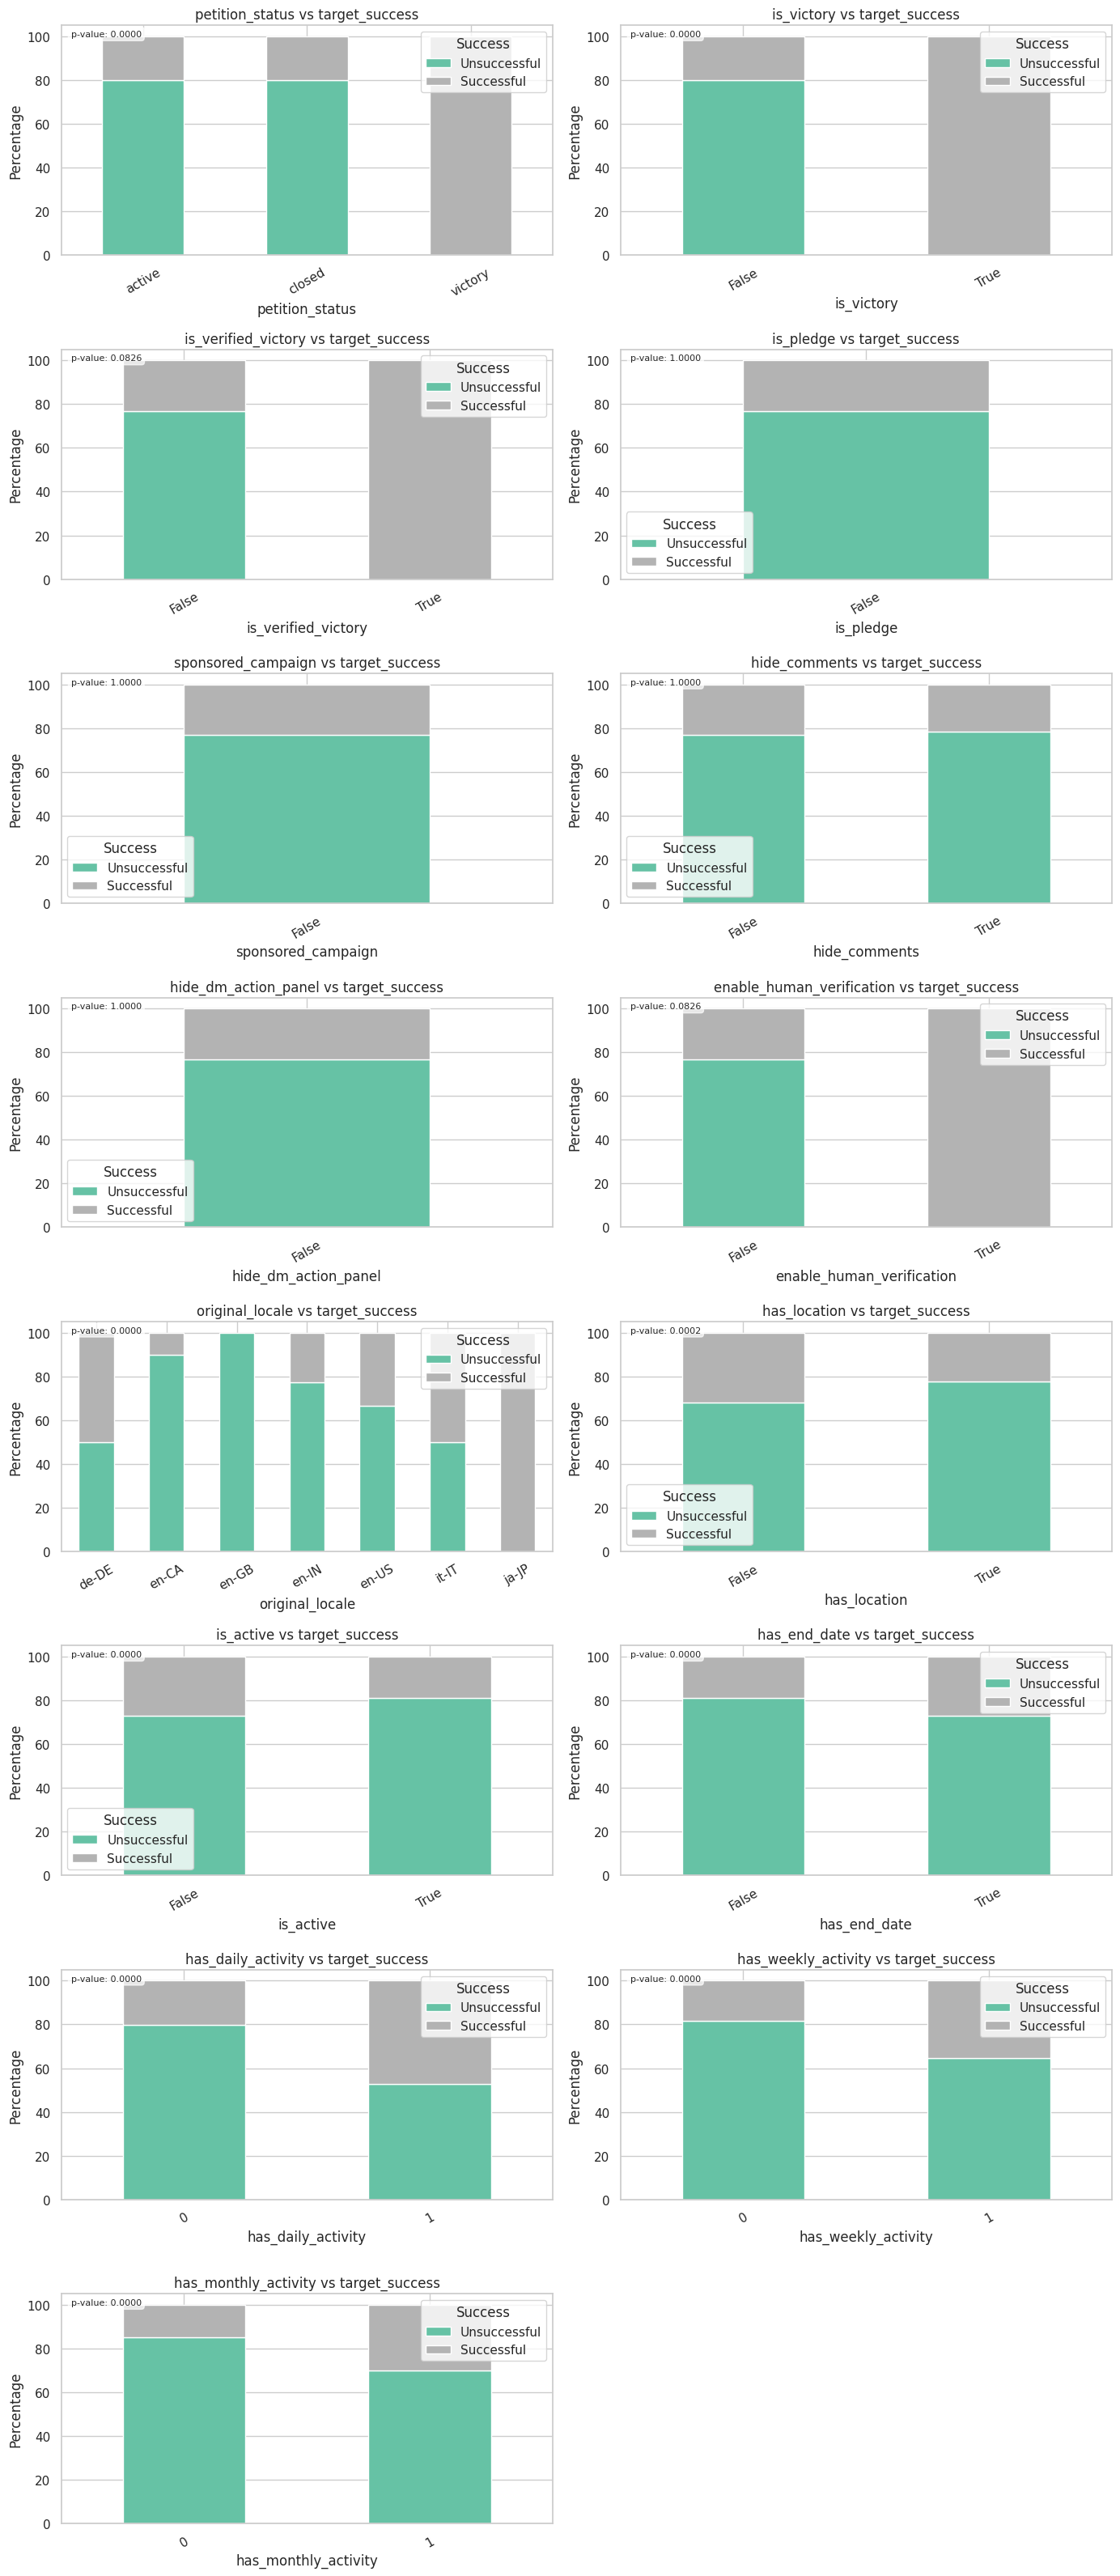


Categorical Variable Associations with Success:
Variable                 Chi-square     p-value        Significant
----------------------------------------------------------------------
petition_status          409.600.0000         Yes
is_victory               405.130.0000         Yes
is_verified_victory      3.010.0826         No
is_pledge                0.001.0000         No
sponsored_campaign       0.001.0000         No
hide_comments            0.001.0000         No
hide_dm_action_panel     0.001.0000         No
enable_human_verificatio 3.010.0826         No
original_locale          40.020.0000         Yes
has_location             14.110.0002         Yes
is_active                27.350.0000         Yes
has_end_date             27.350.0000         Yes
has_daily_activity       131.400.0000         Yes
has_weekly_activity      98.430.0000         Yes
has_monthly_activity     95.130.0000         Yes

2. NUMERICAL VARIABLES vs TARGET_SUCCESS
---------------------------------------------

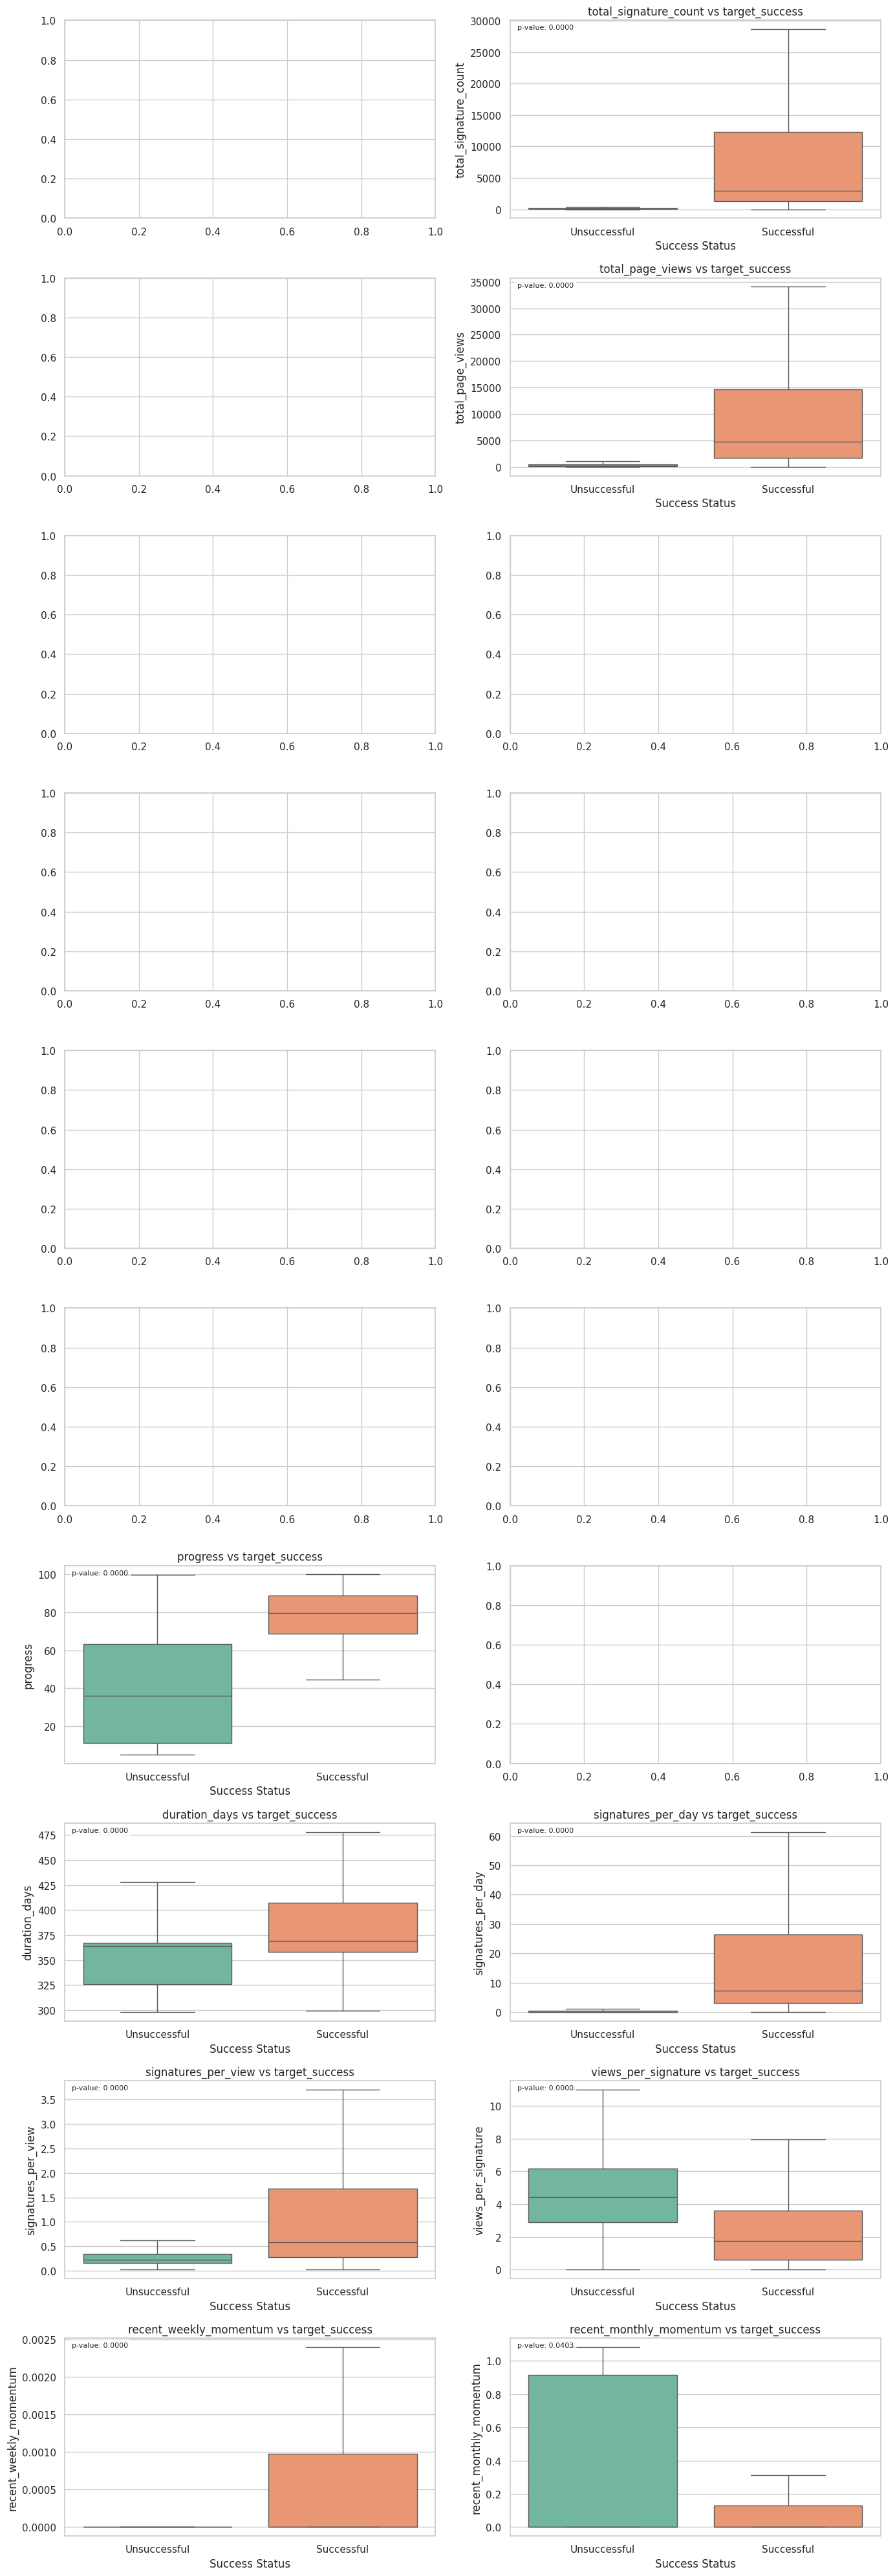


Numerical Variable Associations with Success:
Variable                 Unsuccessful Med. Successful Med. p-value     Significant
-------------------------------------------------------------------------------------
total_signature_count    36.002978.00         0.0000      Yes
total_page_views         155.004686.00         0.0000      Yes
progress                 36.0079.52           0.0000      Yes
duration_days            364.00369.00          0.0000      Yes
signatures_per_day       0.107.25            0.0000      Yes
signatures_per_view      0.230.58            0.0000      Yes
views_per_signature      4.431.73            0.0000      Yes
recent_weekly_momentum   0.000.00            0.0000      Yes
recent_monthly_momentum  0.000.00            0.0403      Yes

3. CORRELATION WITH TARGET_SUCCESS
--------------------------------------------------
Numerical Variable Correlations with Success (sorted by strength):
Variable                      Correlation
---------------------------------

In [490]:
# BIVARIATE ANALYSIS: TARGET_SUCCESS vs CATEGORICAL & NUMERICAL VARIABLES
print("\n" + "="*60)
print("BIVARIATE ANALYSIS: TARGET_SUCCESS vs OTHER VARIABLES")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu
import numpy as np

# 1. CATEGORICAL VARIABLES vs TARGET_SUCCESS
print("1. CATEGORICAL VARIABLES vs TARGET_SUCCESS")
print("-" * 50)

# Grid plot setup
cols = 2
rows = (len(categorical_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

# Plot stacked bar chart for each categorical variable
categorical_stats = {}
for i, col in enumerate(categorical_cols):
    if col in df.columns:
        # Create crosstab
        ct = pd.crosstab(df[col], df['target_success'], normalize='index') * 100
        ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
        axes[i].set_title(f'{col} vs target_success')
        axes[i].set_ylabel('Percentage')
        axes[i].set_xlabel(col)
        axes[i].legend(title='Success', labels=['Unsuccessful', 'Successful'])
        axes[i].tick_params(axis='x', rotation=30)

        # Statistical test (Chi-square)
        chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['target_success']))
        categorical_stats[col] = {'chi2': chi2, 'p_value': p_value}

        # Add p-value to plot
        axes[i].text(0.02, 0.98, f'p-value: {p_value:.4f}',
                    transform=axes[i].transAxes, fontsize=8,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Summary of categorical associations
print("\nCategorical Variable Associations with Success:")
print("Variable".ljust(25) + "Chi-square".ljust(15) + "p-value".ljust(15) + "Significant")
print("-" * 70)
for var, stats in categorical_stats.items():
    significant = "Yes" if stats['p_value'] < 0.05 else "No"
    print(f"{var[:24].ljust(25)}{stats['chi2']:.2f}".ljust(15) +
          f"{stats['p_value']:.4f}".ljust(15) + significant)

# 2. NUMERICAL VARIABLES vs TARGET_SUCCESS
print(f"\n2. NUMERICAL VARIABLES vs TARGET_SUCCESS")
print("-" * 50)

# Grid setup
cols = 2
rows = (len(numerical_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

# Plot boxplot for each numerical variable
numerical_stats = {}
for i, col in enumerate(numerical_cols):
    if col in df.columns:
        # Create boxplot
        sns.boxplot(data=df, x='target_success', y=col, hue='target_success',
                   showfliers=False, legend=False, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col} vs target_success')
        axes[i].set_xlabel('Success Status')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Unsuccessful', 'Successful'])

        # Statistical test (Mann-Whitney U)
        unsuccessful = df[df['target_success'] == 0][col].dropna()
        successful = df[df['target_success'] == 1][col].dropna()

        if len(unsuccessful) > 0 and len(successful) > 0:
            statistic, p_value = mannwhitneyu(unsuccessful, successful, alternative='two-sided')
            numerical_stats[col] = {
                'statistic': statistic,
                'p_value': p_value,
                'unsuccessful_median': unsuccessful.median(),
                'successful_median': successful.median()
            }

            # Add p-value to plot
            axes[i].text(0.02, 0.98, f'p-value: {p_value:.4f}',
                        transform=axes[i].transAxes, fontsize=8,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Summary of numerical associations
print("\nNumerical Variable Associations with Success:")
print("Variable".ljust(25) + "Unsuccessful Med.".ljust(18) + "Successful Med.".ljust(16) + "p-value".ljust(12) + "Significant")
print("-" * 85)
for var, stats in numerical_stats.items():
    significant = "Yes" if stats['p_value'] < 0.05 else "No"
    print(f"{var[:24].ljust(25)}{stats['unsuccessful_median']:.2f}".ljust(18) +
          f"{stats['successful_median']:.2f}".ljust(16) +
          f"{stats['p_value']:.4f}".ljust(12) + significant)

# 3. CORRELATION ANALYSIS
print(f"\n3. CORRELATION WITH TARGET_SUCCESS")
print("-" * 50)

# Calculate correlations for numerical variables
correlations = []
for col in numerical_cols:
    if col in df.columns:
        corr = df[col].corr(df['target_success'])
        correlations.append((col, corr))

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

print("Numerical Variable Correlations with Success (sorted by strength):")
print("Variable".ljust(30) + "Correlation")
print("-" * 50)
for var, corr in correlations:
    if not pd.isna(corr):
        print(f"{var[:29].ljust(30)}{corr:.4f}")

# 4. SUCCESS RATE BY CATEGORICAL GROUPS
print(f"\n4. SUCCESS RATES BY CATEGORICAL GROUPS")
print("-" * 50)

for col in categorical_cols[:5]:  # Show top 5 categorical variables
    if col in df.columns:
        success_rates = df.groupby(col)['target_success'].agg(['count', 'sum', 'mean'])
        success_rates.columns = ['Total', 'Successful', 'Success_Rate']
        success_rates['Success_Rate'] *= 100
        success_rates = success_rates.sort_values('Success_Rate', ascending=False)

        print(f"\n{col.upper()}:")
        print(success_rates.round(1))

print(f"\nBivariate analysis complete!")
print(f"Key findings:")
print(f"- Variables with p-value < 0.05 show significant association with success")
print(f"- Higher correlations indicate stronger linear relationships")
print(f"- Success rate differences highlight practical impact of different categories")

Export File

In [494]:
# Comprehensive Export
comprehensive_columns = [
    # Core identifiers and target
    'petition_id', 'created_at', 'target_success',

    # Success metrics
    'is_victory', 'victory_date', 'petition_status',

    # Performance metrics (including log-transformed version)
    'signatures_per_day', 'log_signatures_per_day', 'signatures_per_view', 'views_per_signature',
    'total_signature_count', 'total_page_views', 'progress',

    # Activity patterns
    'has_daily_activity', 'has_weekly_activity', 'has_monthly_activity',
    'recent_weekly_momentum', 'recent_monthly_momentum',

    # Temporal features (including age analysis)
    'duration_days', 'days_since_creation', 'age_group',
    'end_date', 'is_active', 'has_end_date', 'has_victory_date',

    # Content for NLP
    'title', 'description', 'letter_body', 'targeting_description',
    'petition_ask', 'original_locale',

    # Geographic
    'lat', 'long', 'has_location',

    # Platform features
    'is_verified_victory', 'is_pledge', 'sponsored_campaign',
    'hide_comments', 'hide_dm_action_panel', 'enable_human_verification',

    # Interpretability and alternatives
    'sig_rate_tier', 'success_score'
]


df_preprocessed = df[comprehensive_columns].copy()
df_preprocessed.to_csv('changeorg_preprocessed.csv', index=False)